# 1.LOAD DATA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FPT = pd.read_csv('/kaggle/input/stock-data/data Stock/FPT.csv')
MSN = pd.read_csv('/kaggle/input/stock-data/data Stock/MSN.csv')
PNJ = pd.read_csv('/kaggle/input/stock-data/data Stock/PNJ.csv')
VIC = pd.read_csv('/kaggle/input/stock-data/data Stock/VIC.csv')
print('The dimension of the FTP dataset is:', FPT.shape)
print('The dimension of the MSN dataset is:', MSN.shape)
print('The dimension of the PNJ dataset is:', PNJ.shape)
print('The dimension of the VIC dataset is:', VIC.shape)

The dimension of the FTP dataset is: (97406, 8)
The dimension of the MSN dataset is: (135354, 8)
The dimension of the PNJ dataset is: (125309, 8)
The dimension of the VIC dataset is: (101266, 8)


In [217]:
print(FPT.head())
print(MSN.head())
print(PNJ.head())
print(VIC.head())

                 Open       High        Low      Close   Volume
Date/Time                                                      
2020-12-16  57.208920  57.230047  57.183568  57.203756  1995530
2020-12-17  56.720202  56.744949  56.688384  56.720202  3594500
2020-12-18  56.810329  56.833803  56.784507  56.811268  1532820
2020-12-21  57.385981  57.407944  57.366822  57.387850  2307390
2020-12-22  57.588889  57.613426  57.562500  57.586574  2576390
                 Open       High        Low      Close  Volume
Date/Time                                                     
2017-12-25  73.750877  73.762281  73.739474  73.748246  207370
2017-12-26  74.891111  74.908889  74.874074  74.891111  403710
2017-12-27  75.285401  75.308029  75.258394  75.285401  517920
2017-12-28  75.181982  75.207207  75.173874  75.200000  377030
2017-12-29  76.541463  76.563415  76.509756  76.534146  226880
                 Open       High        Low      Close  Volume
Date/Time                                       

# 2. EXPLORATORY DATA


In [4]:
FPT.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [5]:
MSN.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


In [6]:
PNJ.describe()

,Open,High,Low,Close,Volume,Open Interest
count,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0
mean,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0
std,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0
min,44.430000,44.530000,44.040000,44.140000,1.000000,0.0
25%,64.600000,64.700000,64.570000,64.600000,220.000000,0.0
50%,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0
75%,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0
max,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0


In [7]:
VIC.describe()

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


## 2.2 Dataset info

Mã chứng khoán: Ký hiệu của cổ phiếu (trong trường hợp này, là "FPT").

Ngày/Giờ: Ngày và giờ của điểm dữ liệu được ghi lại.

Mở cửa: Giá mở cửa của cổ phiếu tại thời điểm đó.

Cao nhất: Giá cao nhất của cổ phiếu trong khoảng thời gian đó.

Thấp nhất: Giá thấp nhất của cổ phiếu trong khoảng thời gian đó.

Đóng cửa: Giá đóng cửa của cổ phiếu tại thời điểm đó.

Khối lượng: Khối lượng giao dịch (số cổ phiếu) tại thời điểm đó.

Lãi ròng mở cửa: Lãi ròng mở cửa tại thời điểm đó (tổng số hợp đồng phái sinh chưa thanh toán).

**do Lãi ròng mở cửa không có giá trị nên tôi sẽ drop cột đó**

In [8]:
def drop_column(dataframe, column_name):
    if column_name in dataframe.columns:
        return dataframe.drop(columns=[column_name])
    else:
        print(f"Cột '{column_name}' không tồn tại trong DataFrame.")
        return dataframe
FPT=drop_column(FPT,'Open Interest')
MSN=drop_column(MSN,'Open Interest')
PNJ=drop_column(PNJ,'Open Interest')
VIC=drop_column(VIC,'Open Interest')

tôi sẽ reset lại index tính trung bình các cột lại open , high , low , close và tổng cột volume lại 

In [9]:
def set_date_index(data):
    data['Date/Time'] = pd.to_datetime(data['Date/Time']).dt.to_period('D')
    data.set_index('Date/Time', inplace=True)
    return data
def group_and_average(df):
    df = df.groupby( ['Date/Time']).agg({'Open':'mean', 'High':'mean', 'Low':'mean', 'Close':'mean', 'Volume':'sum'})
    return df


In [10]:
set_date_index(FPT)
set_date_index(MSN)
set_date_index(PNJ)
set_date_index(VIC)

,Ticker,Open,High,Low,Close,Volume
Date/Time,,,,,,
2018-10-17,VIC,98.5,98.5,98.5,98.5,390
2018-10-17,VIC,98.5,98.5,98.5,98.5,760
2018-10-17,VIC,98.6,98.6,98.6,98.6,2060
2018-10-17,VIC,98.6,98.6,98.6,98.6,5540
2018-10-17,VIC,98.6,98.7,98.6,98.7,760
...,...,...,...,...,...,...
2020-12-22,VIC,105.8,105.8,105.7,105.7,1870
2020-12-22,VIC,105.7,105.7,105.7,105.7,2510
2020-12-22,VIC,105.7,105.7,105.7,105.7,3620


In [11]:
FPT=group_and_average(FPT)
MSN=group_and_average(MSN)
PNJ=group_and_average(PNJ)
VIC=group_and_average(VIC)

In [12]:
print('The dimension of the FTP dataset is:', FPT.shape)
print('The dimension of the MSN dataset is:', MSN.shape)
print('The dimension of the PNJ dataset is:', PNJ.shape)
print('The dimension of the VIC dataset is:', VIC.shape)
print(FPT.head(10))
print(MSN.head(10))
print(PNJ.head(10))
print(VIC.head(10))

The dimension of the FTP dataset is: (499, 5)
The dimension of the MSN dataset is: (748, 5)
The dimension of the PNJ dataset is: (709, 5)
The dimension of the VIC dataset is: (548, 5)
                 Open       High        Low      Close  Volume
Date/Time                                                     
2018-12-25  30.760000  30.781429  30.744286  30.760000   84960
2018-12-26  31.048016  31.054683  31.042857  31.050159  333590
2018-12-27  31.332537  31.335821  31.327313  31.331567  454860
2018-12-28  31.322213  31.326803  31.318525  31.321557  387170
2019-01-02  31.231709  31.238376  31.224188  31.232393  459120
2019-01-03  30.579669  30.583867  30.572155  30.578619  716600
2019-01-04  30.521185  30.525333  30.518296  30.522963  318570
2019-01-07  31.237465  31.244155  31.234014  31.240211  408470
2019-01-08  31.211389  31.213519  31.207222  31.211389  295660
2019-01-09  31.551935  31.554032  31.546935  31.548952  309040
                 Open       High        Low      Close  Volu

## 2.3 Trend

In [13]:
def plot_trend(dataframe, column_name, window=30, min_periods=1):
    trend = dataframe[column_name].rolling(window=window, center=True, min_periods=min_periods).mean()

    plot_params = dict(
        color="0.75",
        marker=".",
        markeredgecolor="0.25",
        markerfacecolor="0.25",
    )

    plt.figure(figsize=(15, 5))
    plt.plot(dataframe.index.to_timestamp(), dataframe[column_name], **plot_params, label='Original Data')
    plt.plot(trend.index, trend, label=f'Trend (Moving Average, window={window})', linewidth=3)
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.title(f'Trend Analysis of {column_name}')
    plt.legend()
    plt.show()



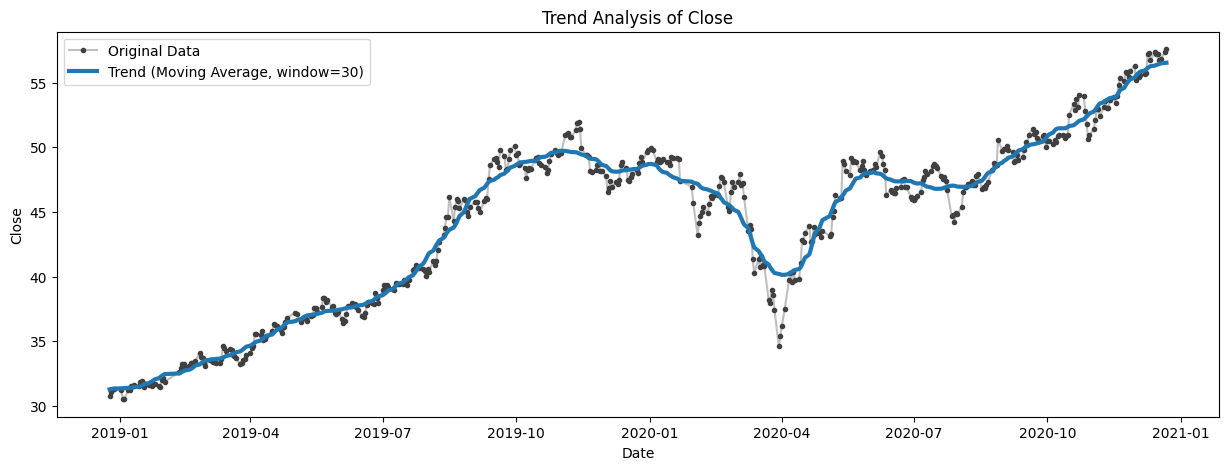

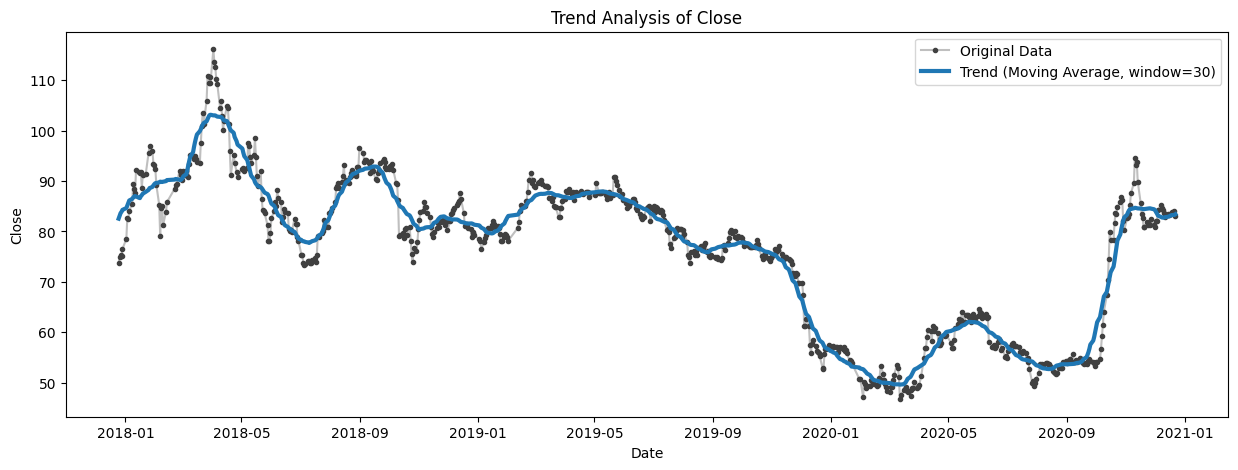

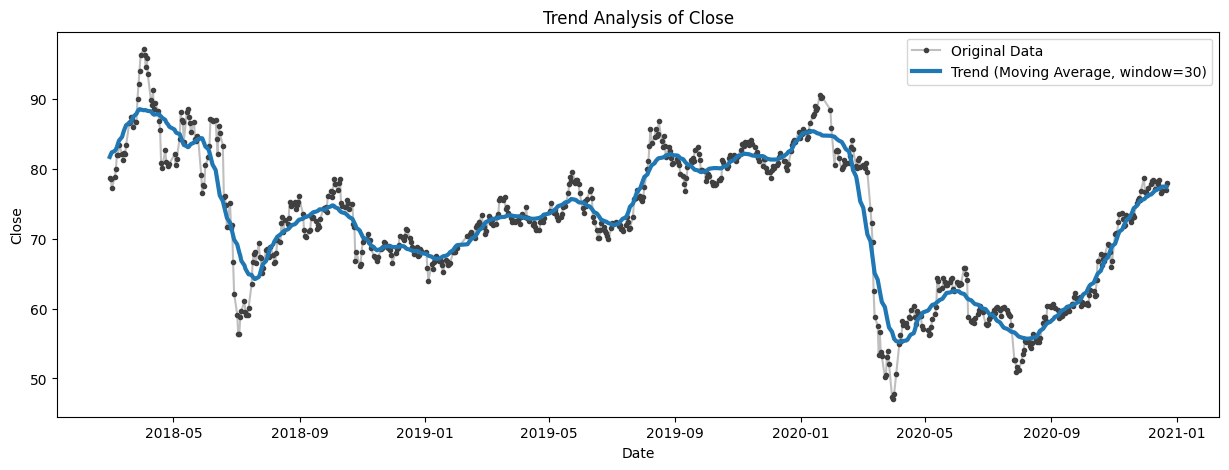

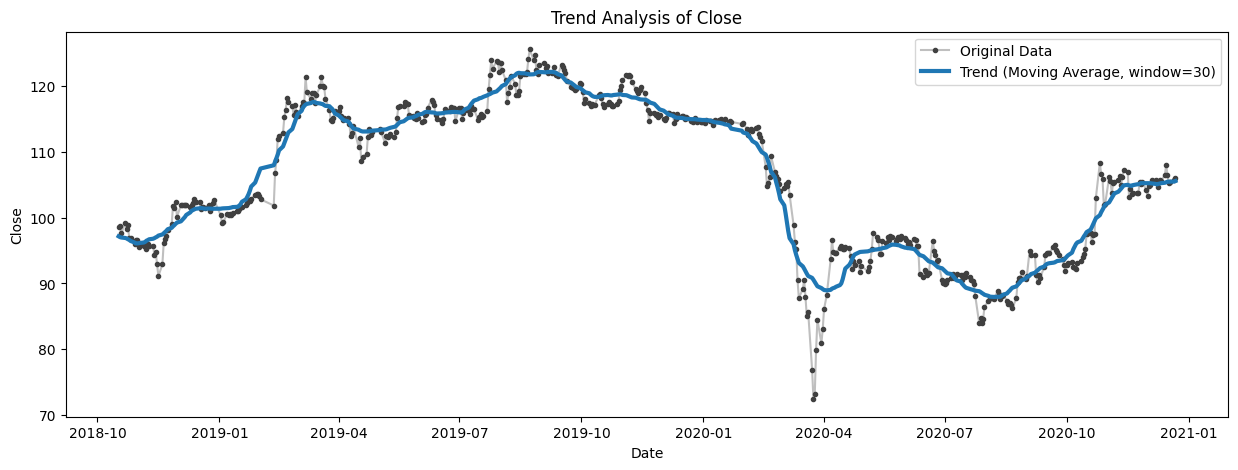

In [14]:
plot_trend(FPT, 'Close')
plot_trend(MSN, 'Close')
plot_trend(PNJ, 'Close')
plot_trend(VIC, 'Close')

## 2.4 Seasonality

In [15]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from warnings import simplefilter
simplefilter("ignore")
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig
def make_lags(ts, lags,name):
    return pd.concat(
        {
            f'{name}_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)
def make_multistep_target(ts, steps,name):
    return pd.concat(
        {f'{name}_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)


* 4 quí trong 1 năm: Thường thể hiện ở các chuỗi như GPD, kim ngạch xuất nhập khẩu,…

* 12 tháng trong 1 năm: Các chuỗi liên quan tới doanh thu, doanh số, du lịch, dịch vụ,…

* 7 ngày trong 1 tuần: Các chuỗi liên quan tới qui luật mua sắm, tiêu dùng, vui chơi giải trí,…

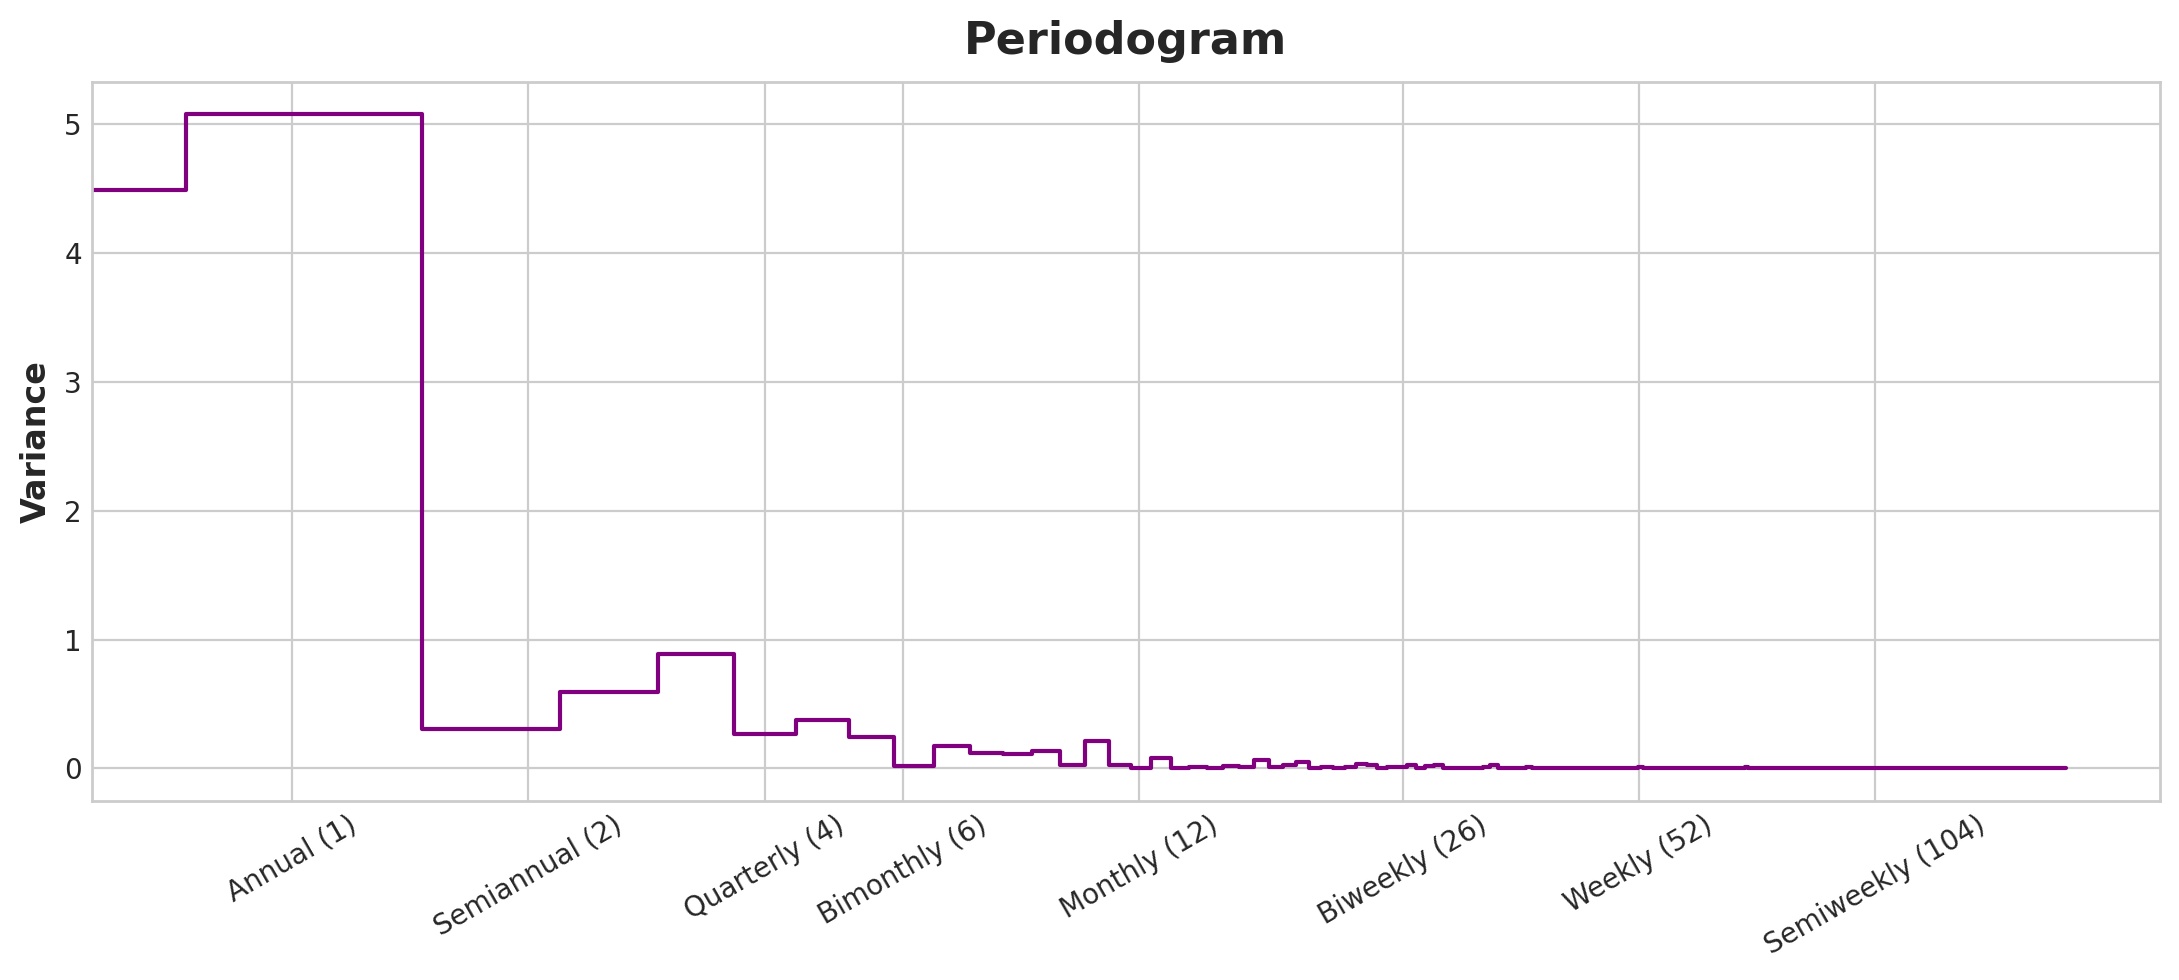

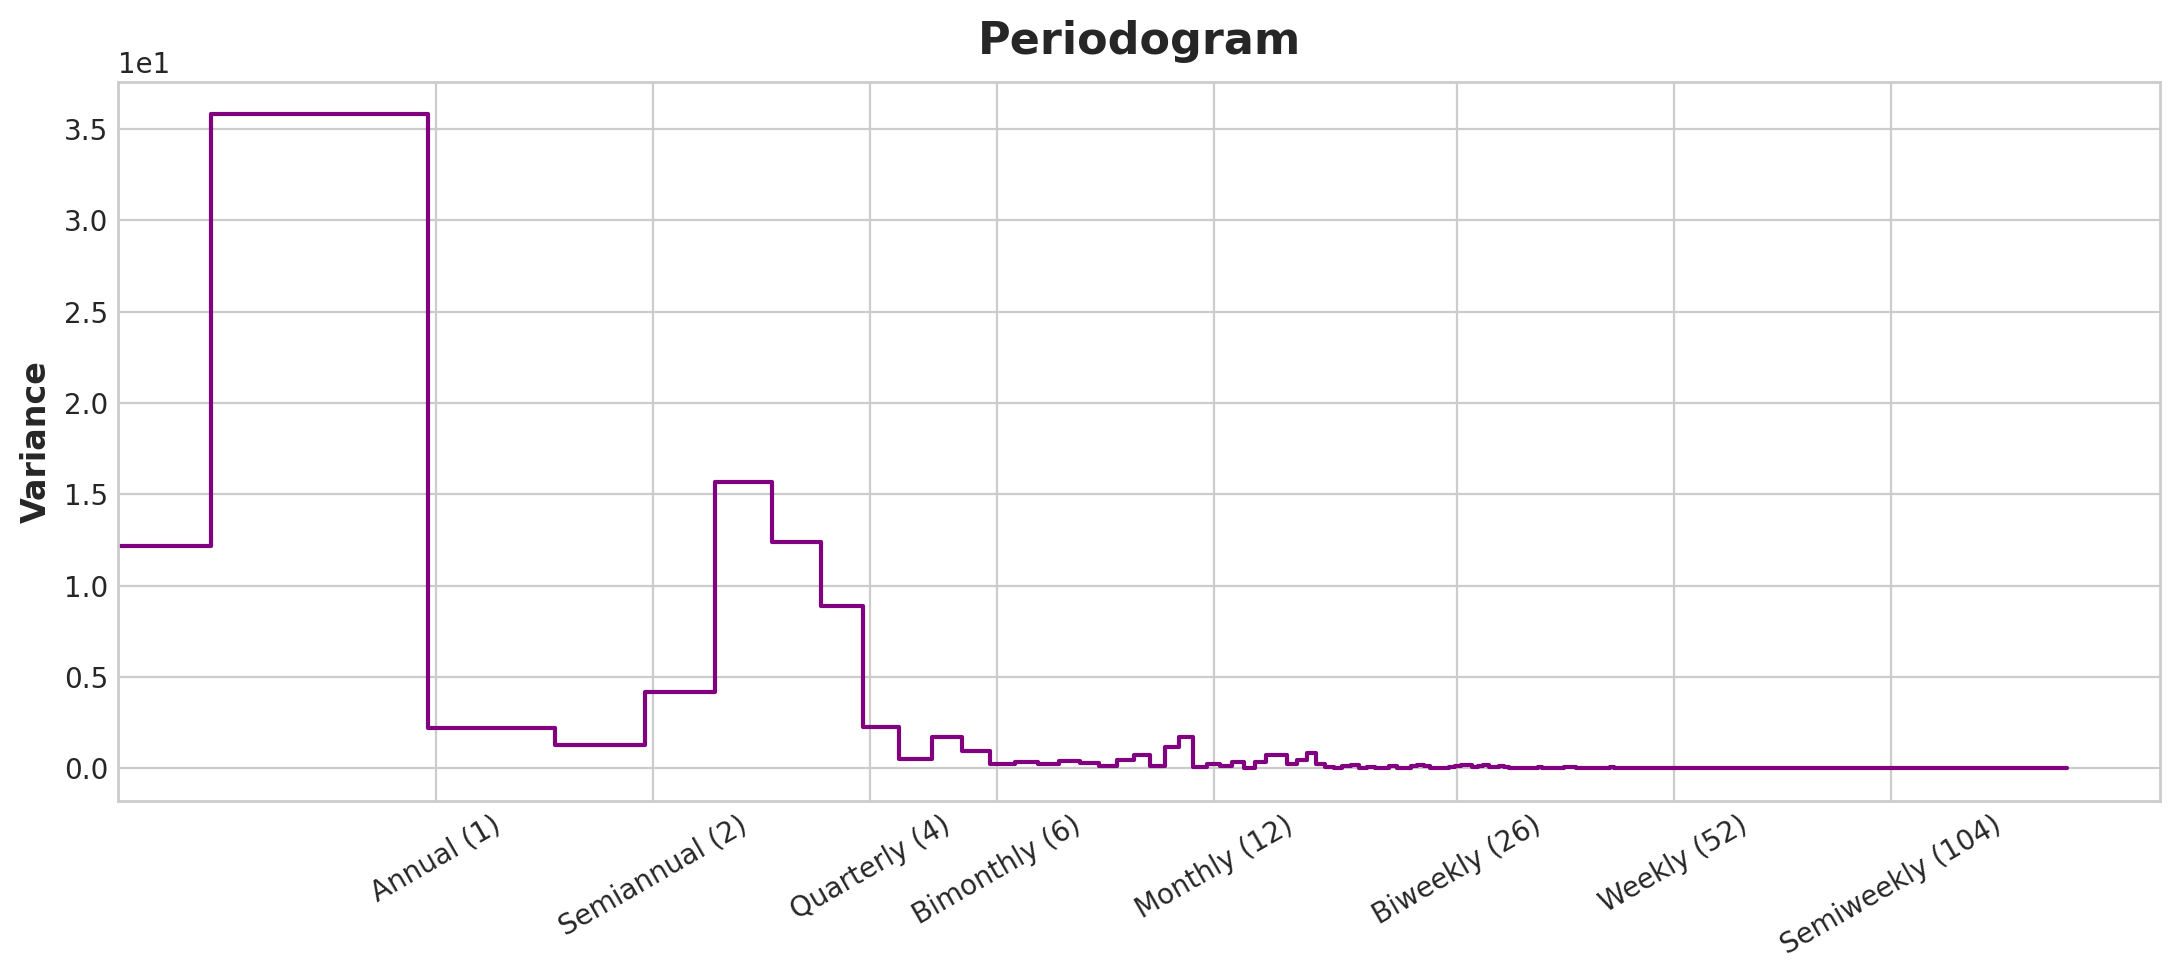

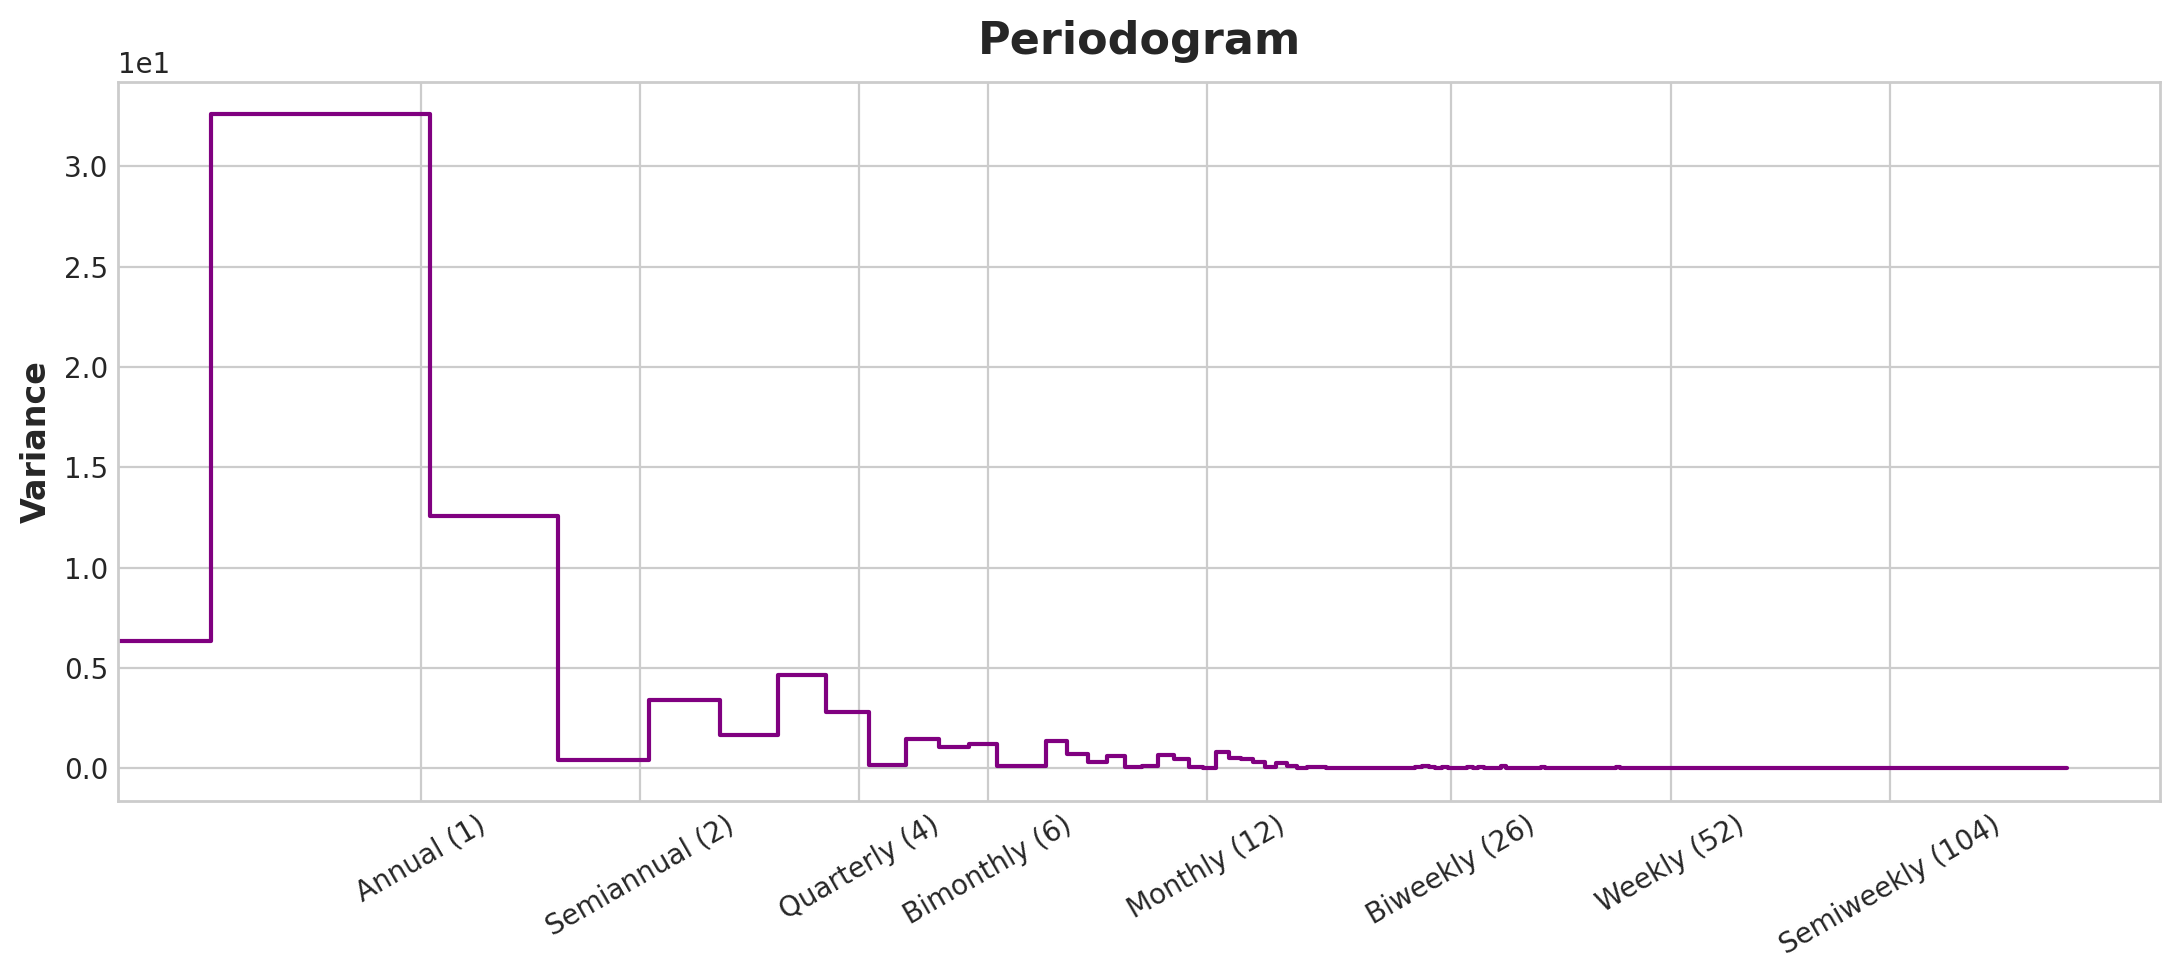

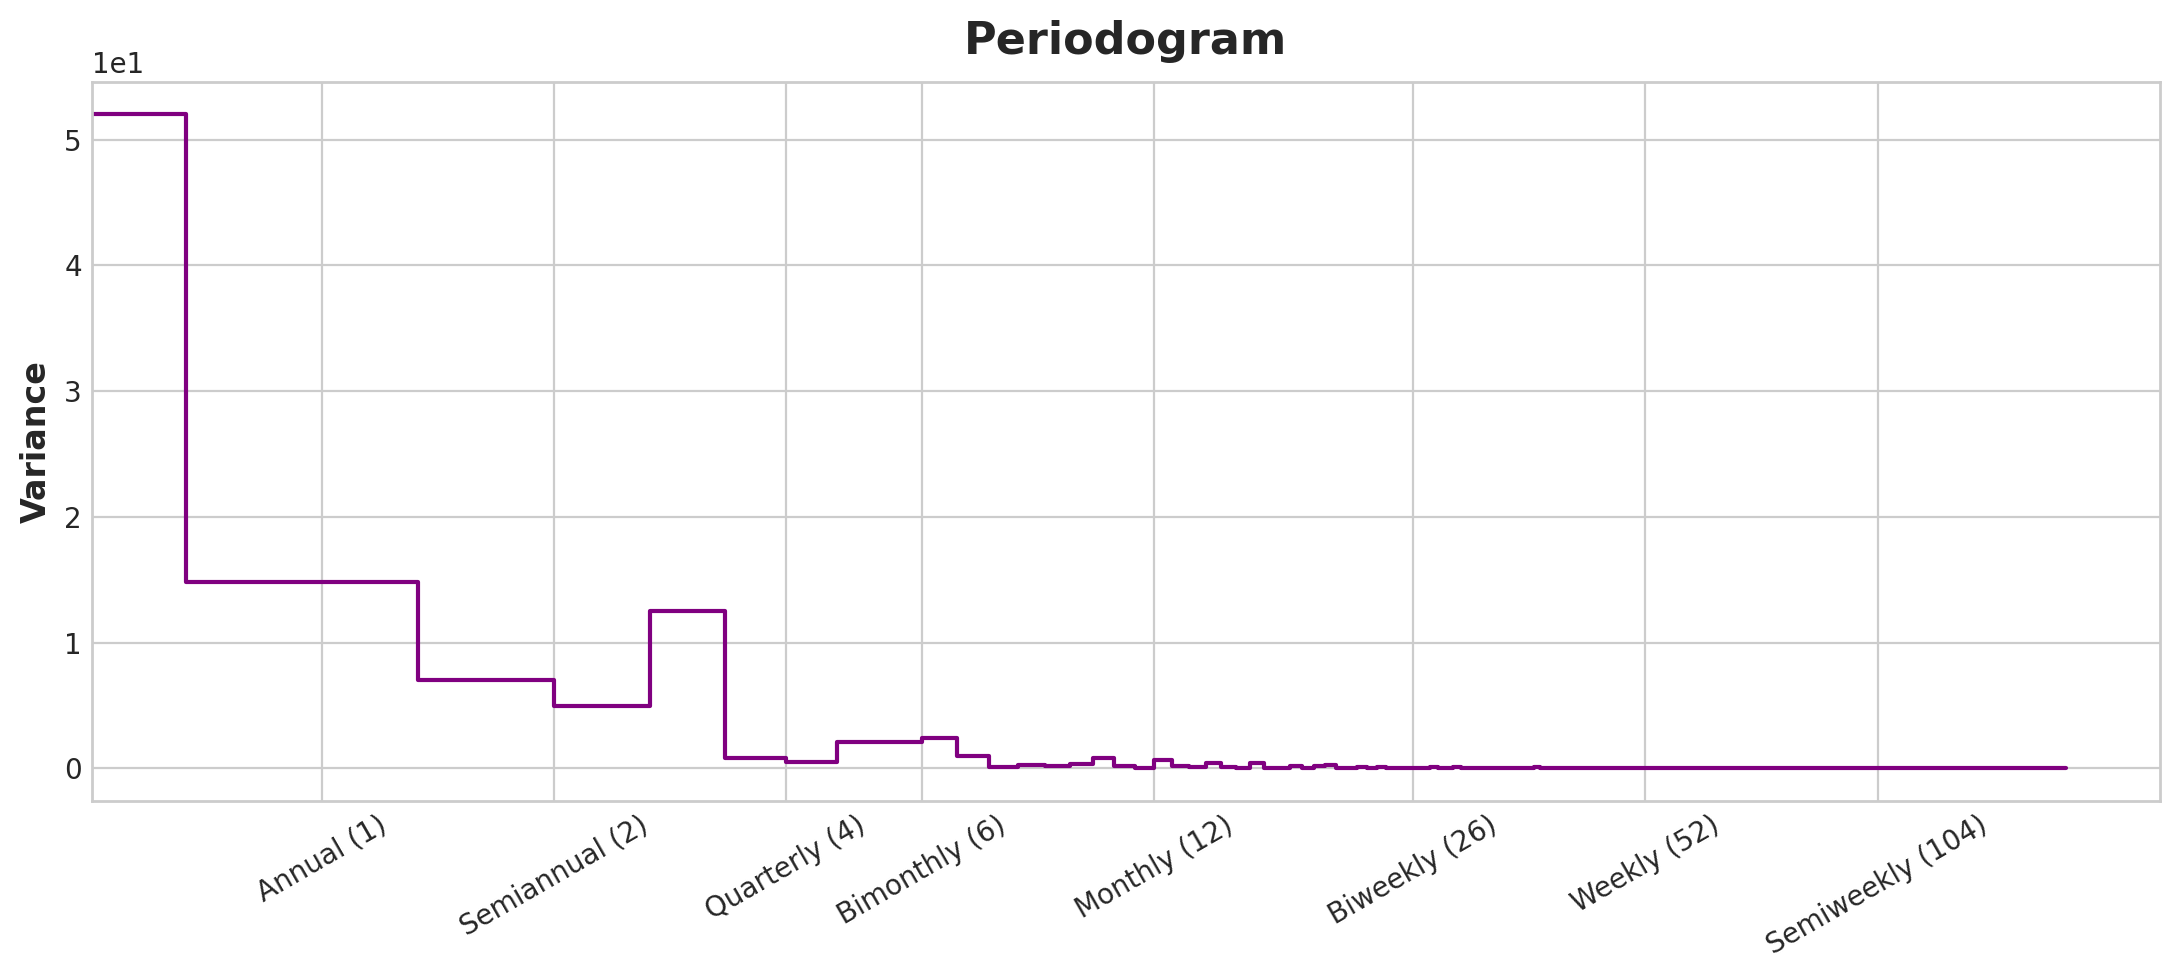

In [16]:
plot_periodogram(FPT.Close);
plot_periodogram(MSN.Close);
plot_periodogram(PNJ.Close);
plot_periodogram(VIC.Close);

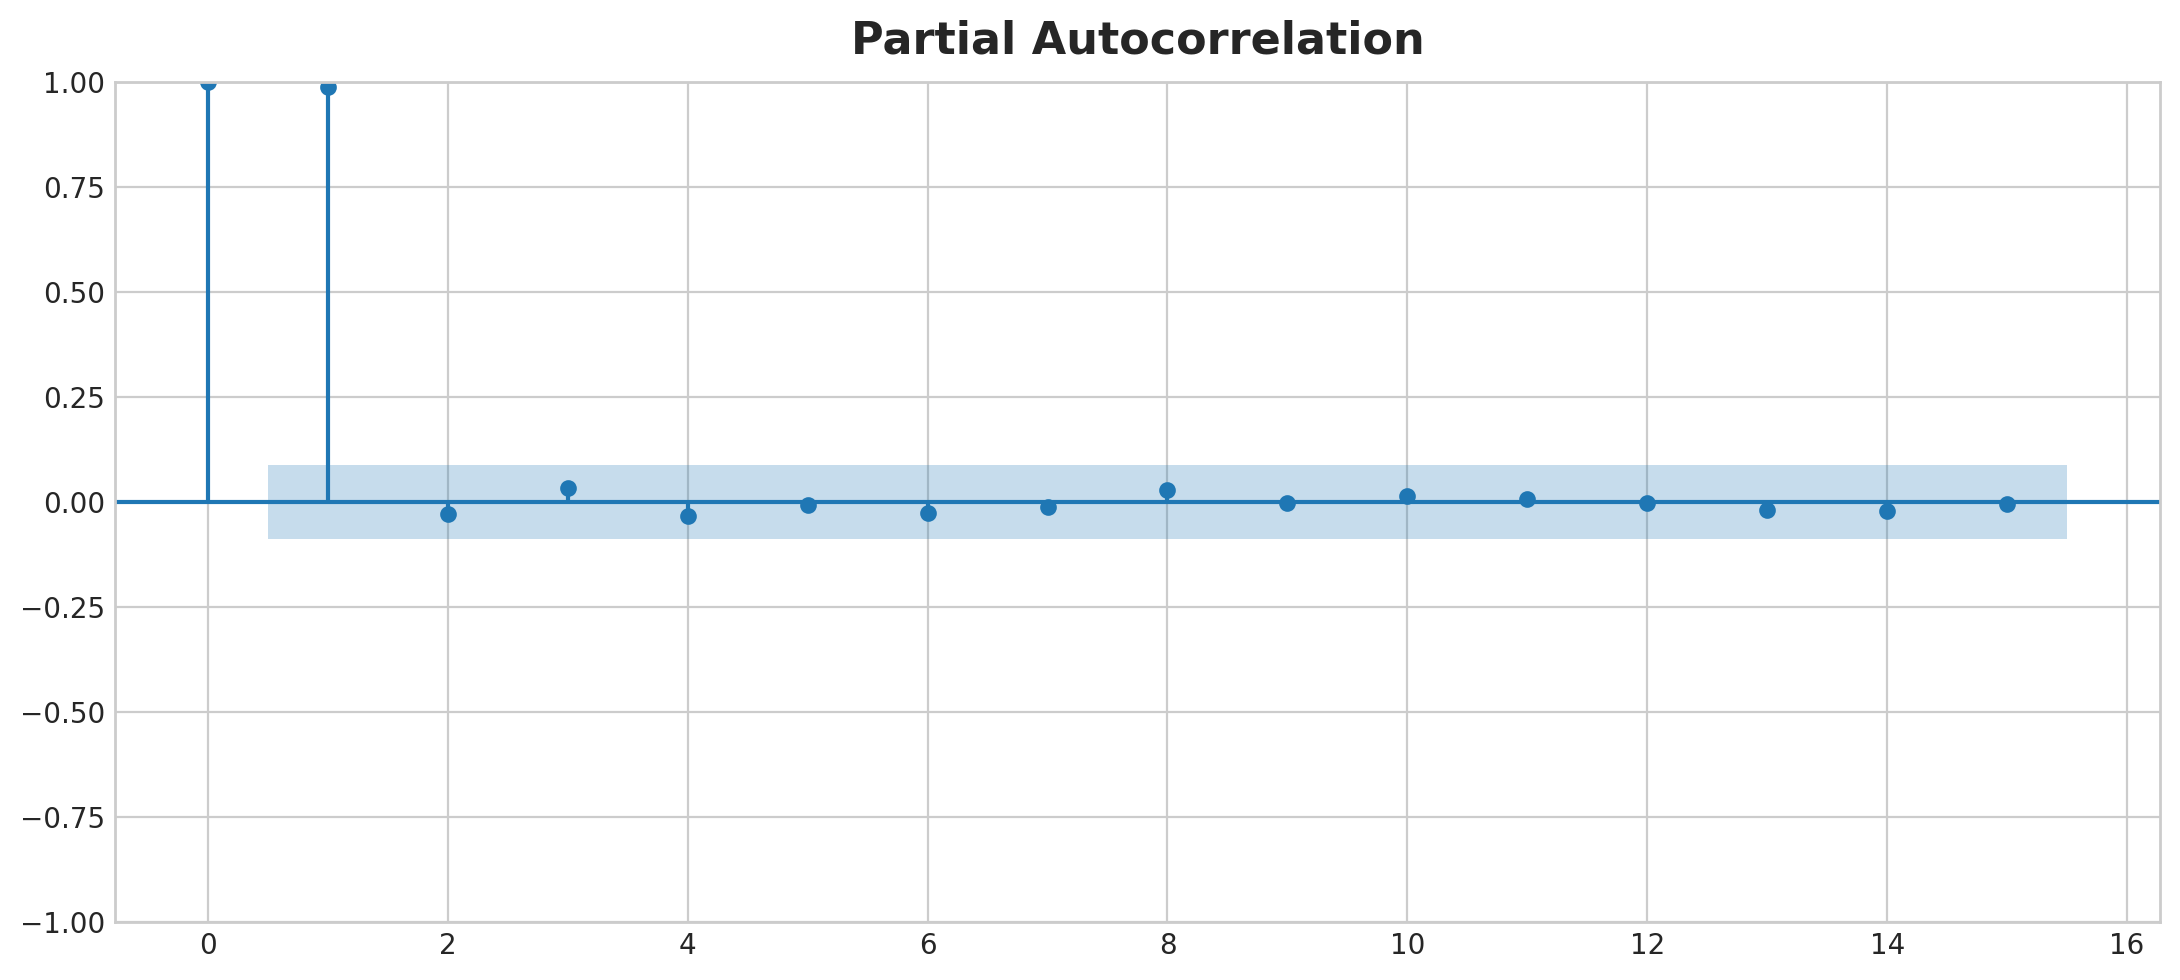

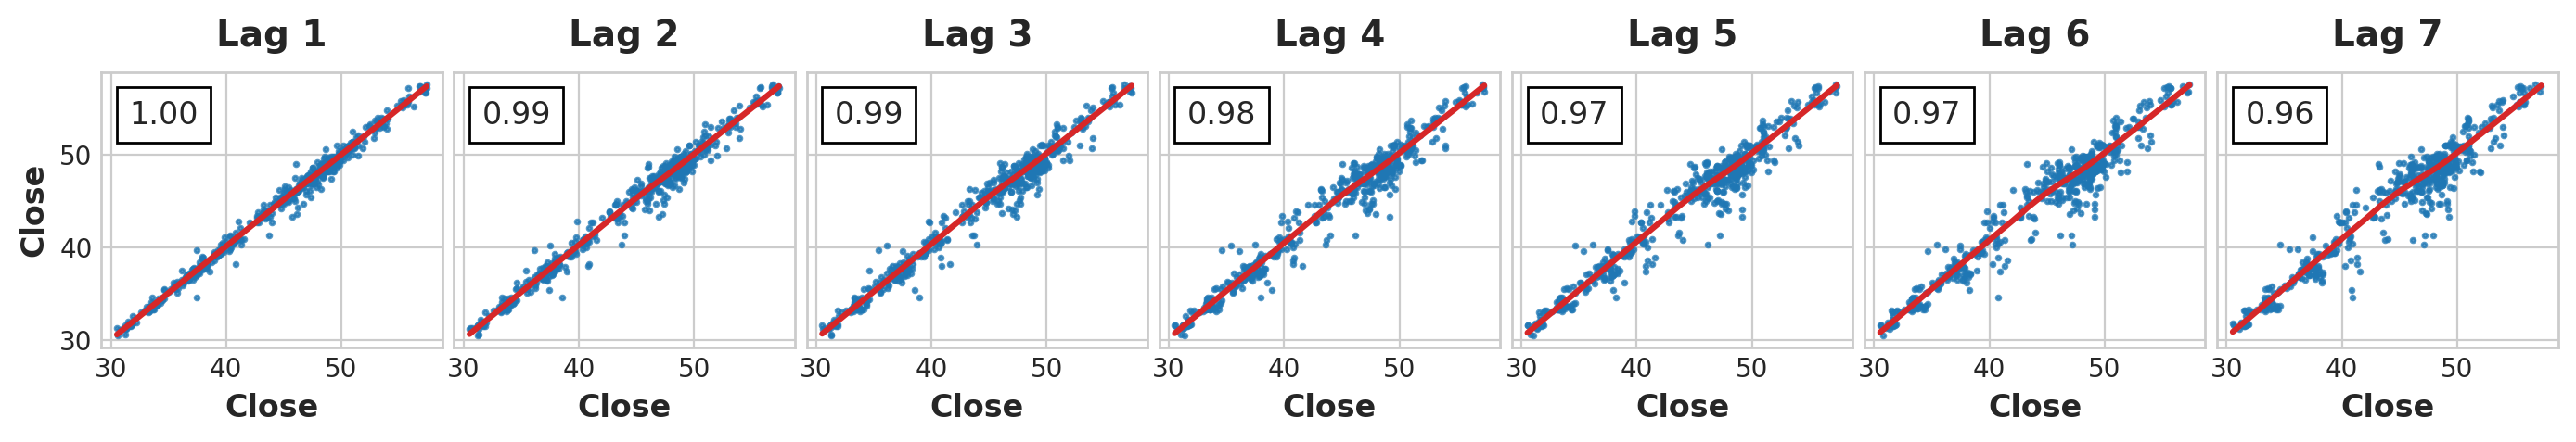

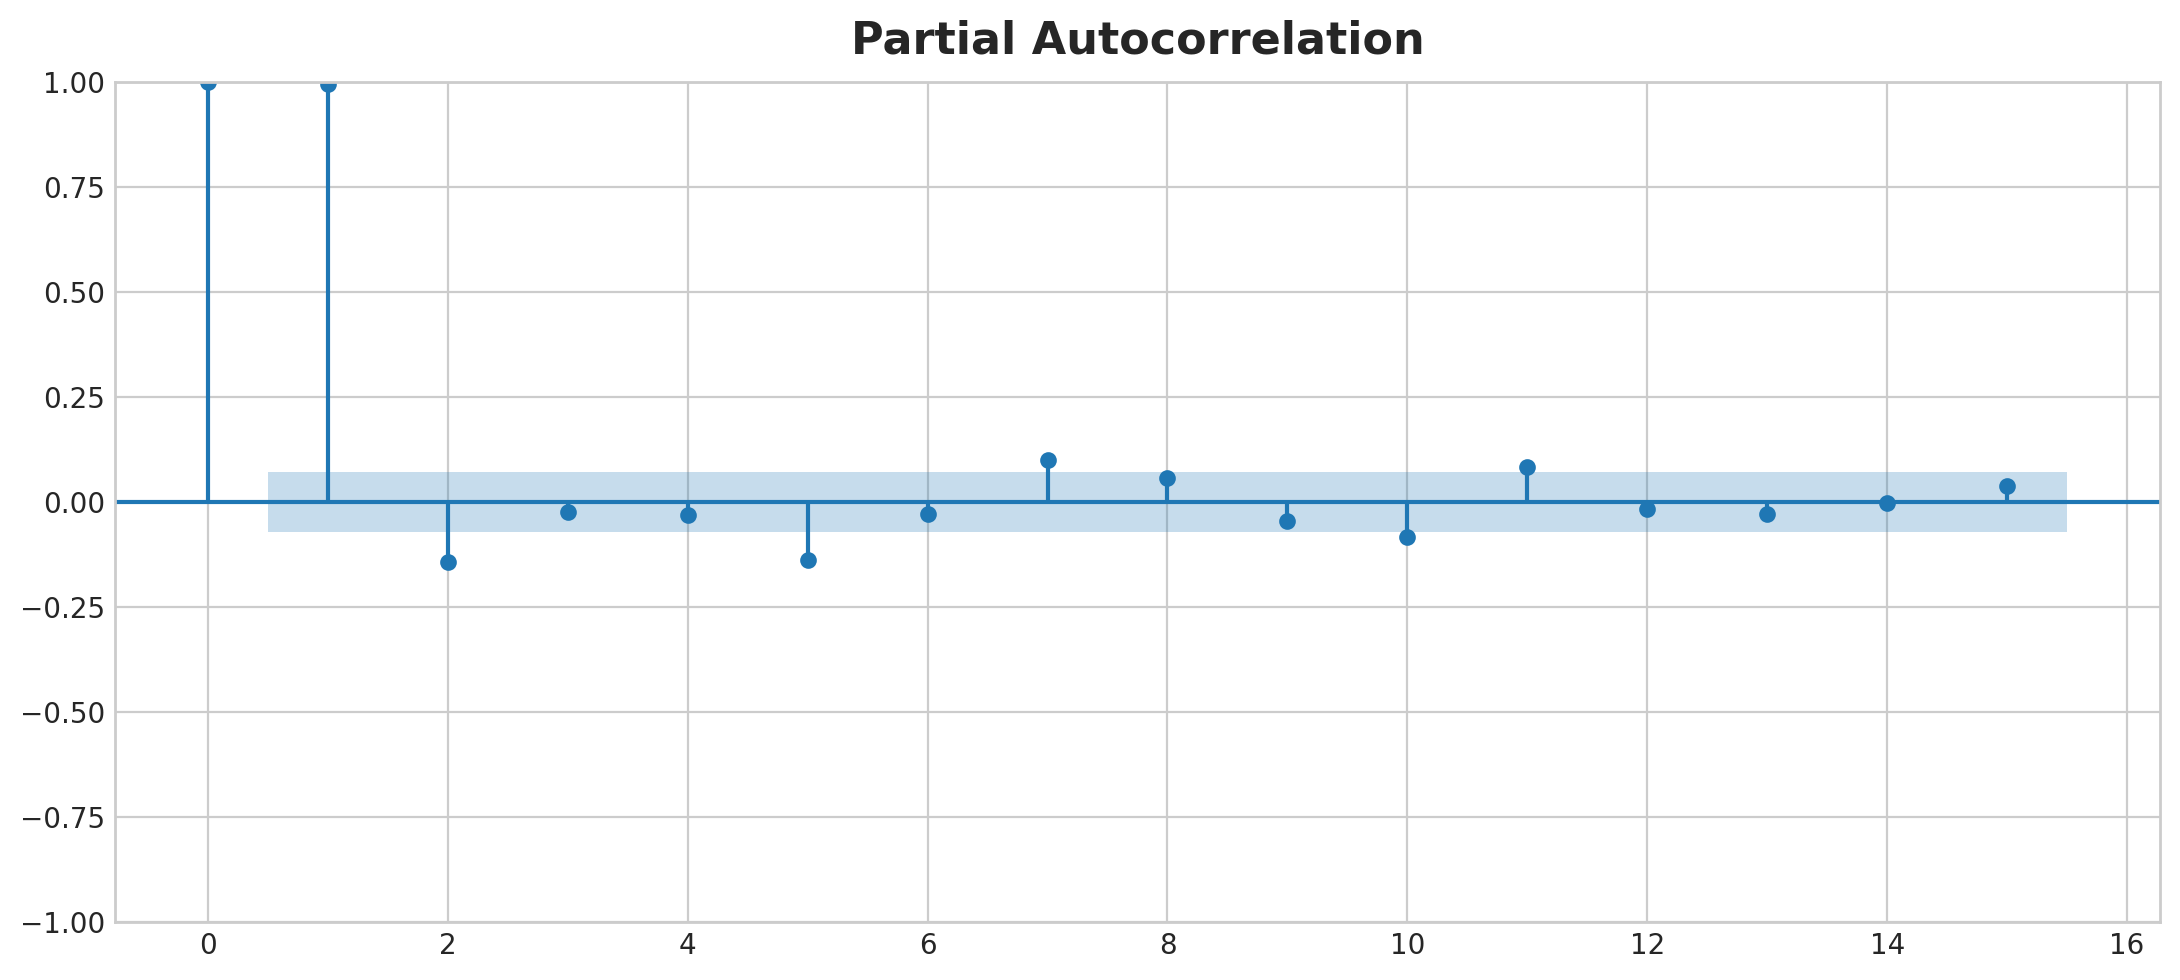

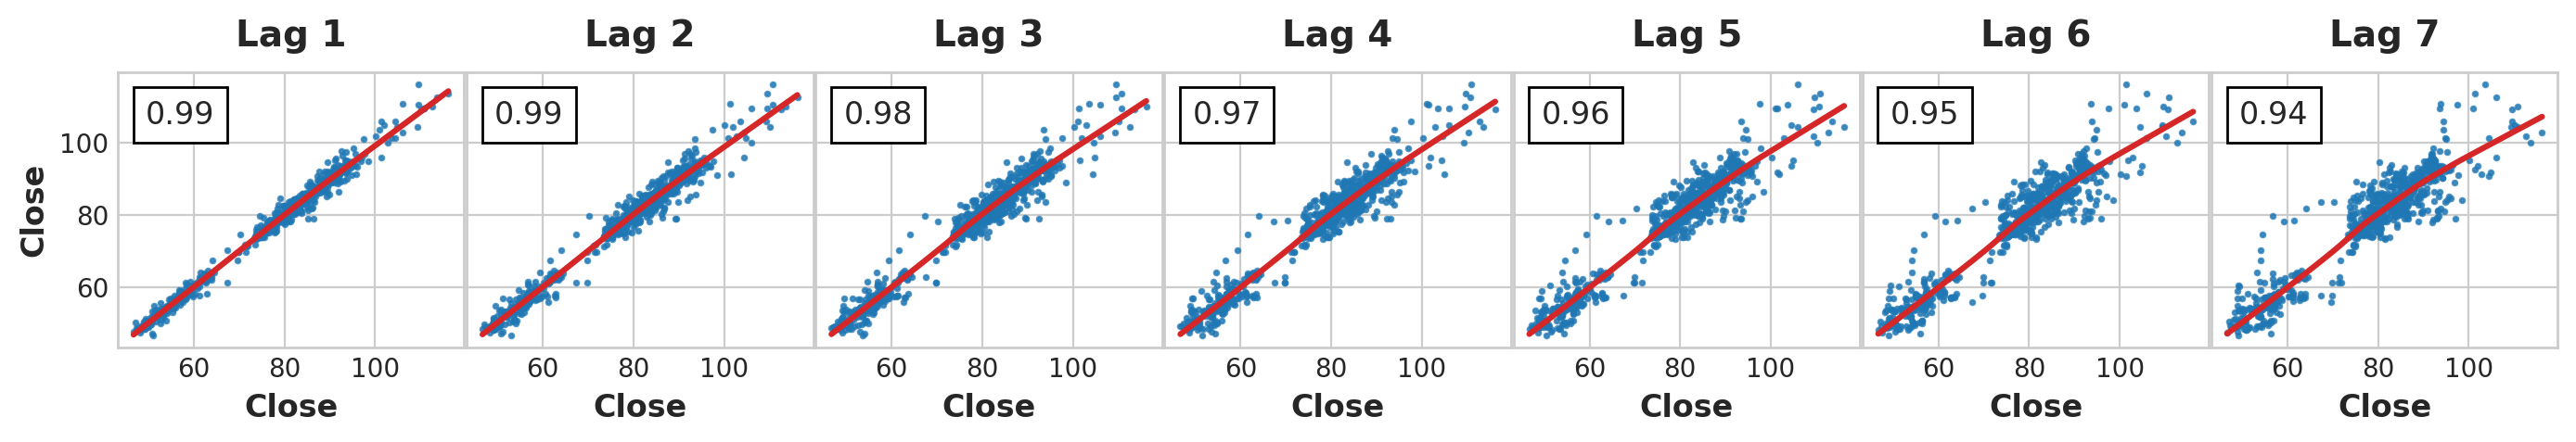

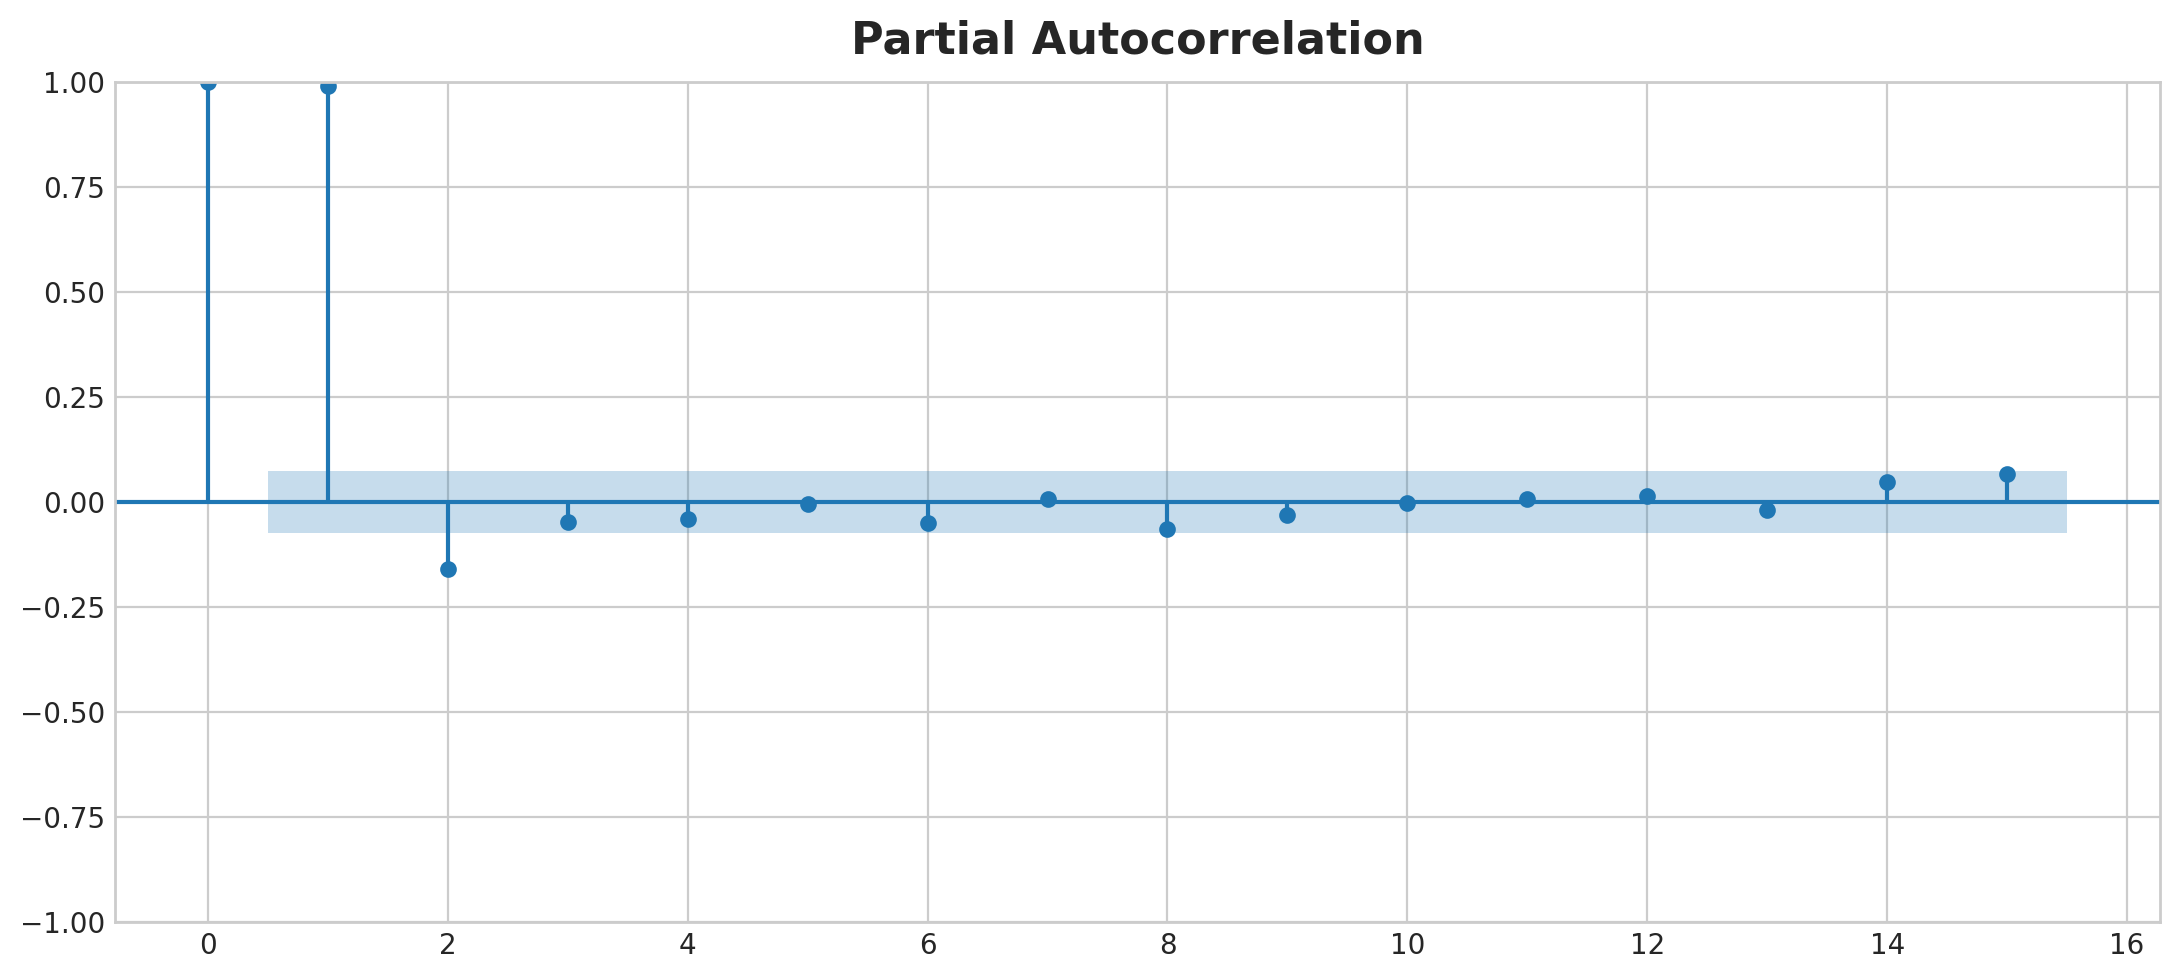

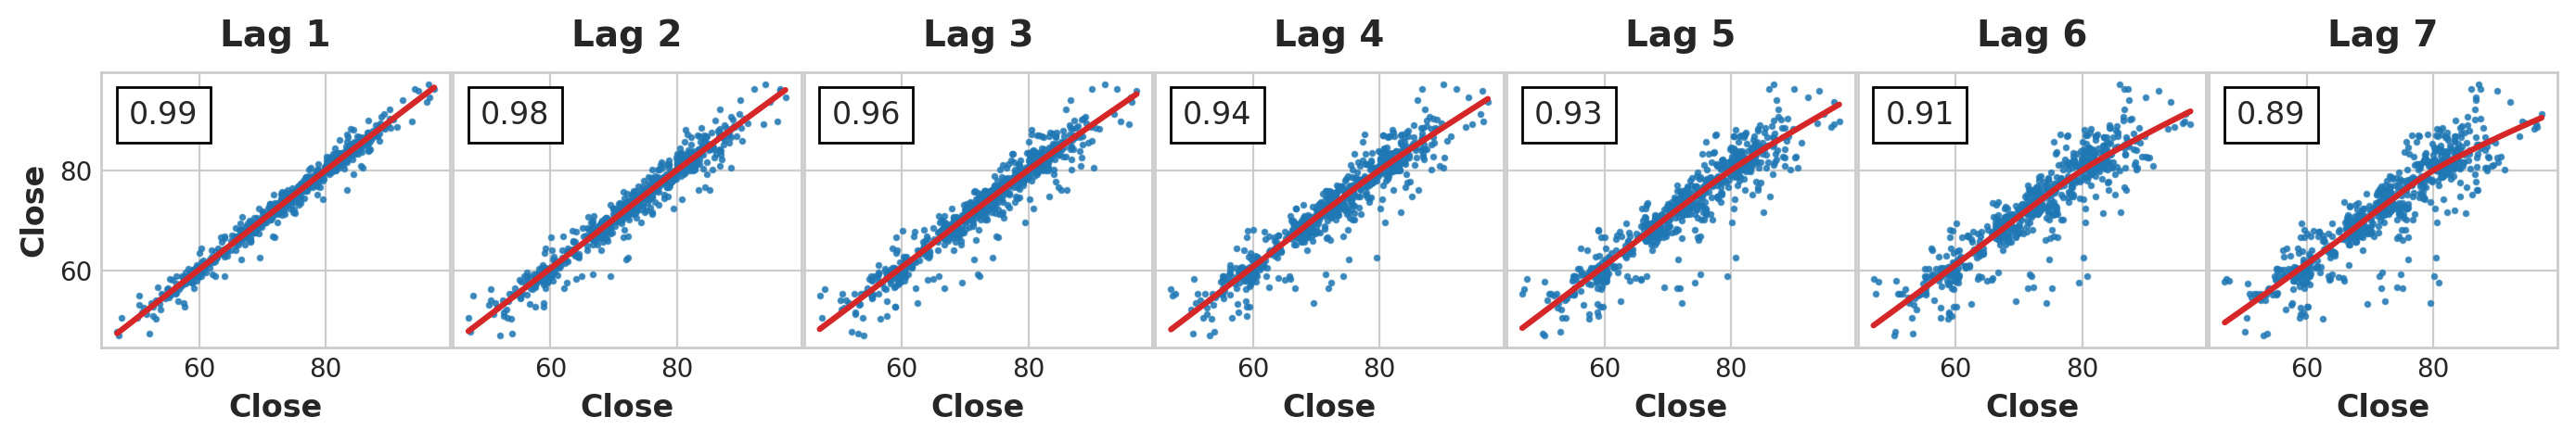

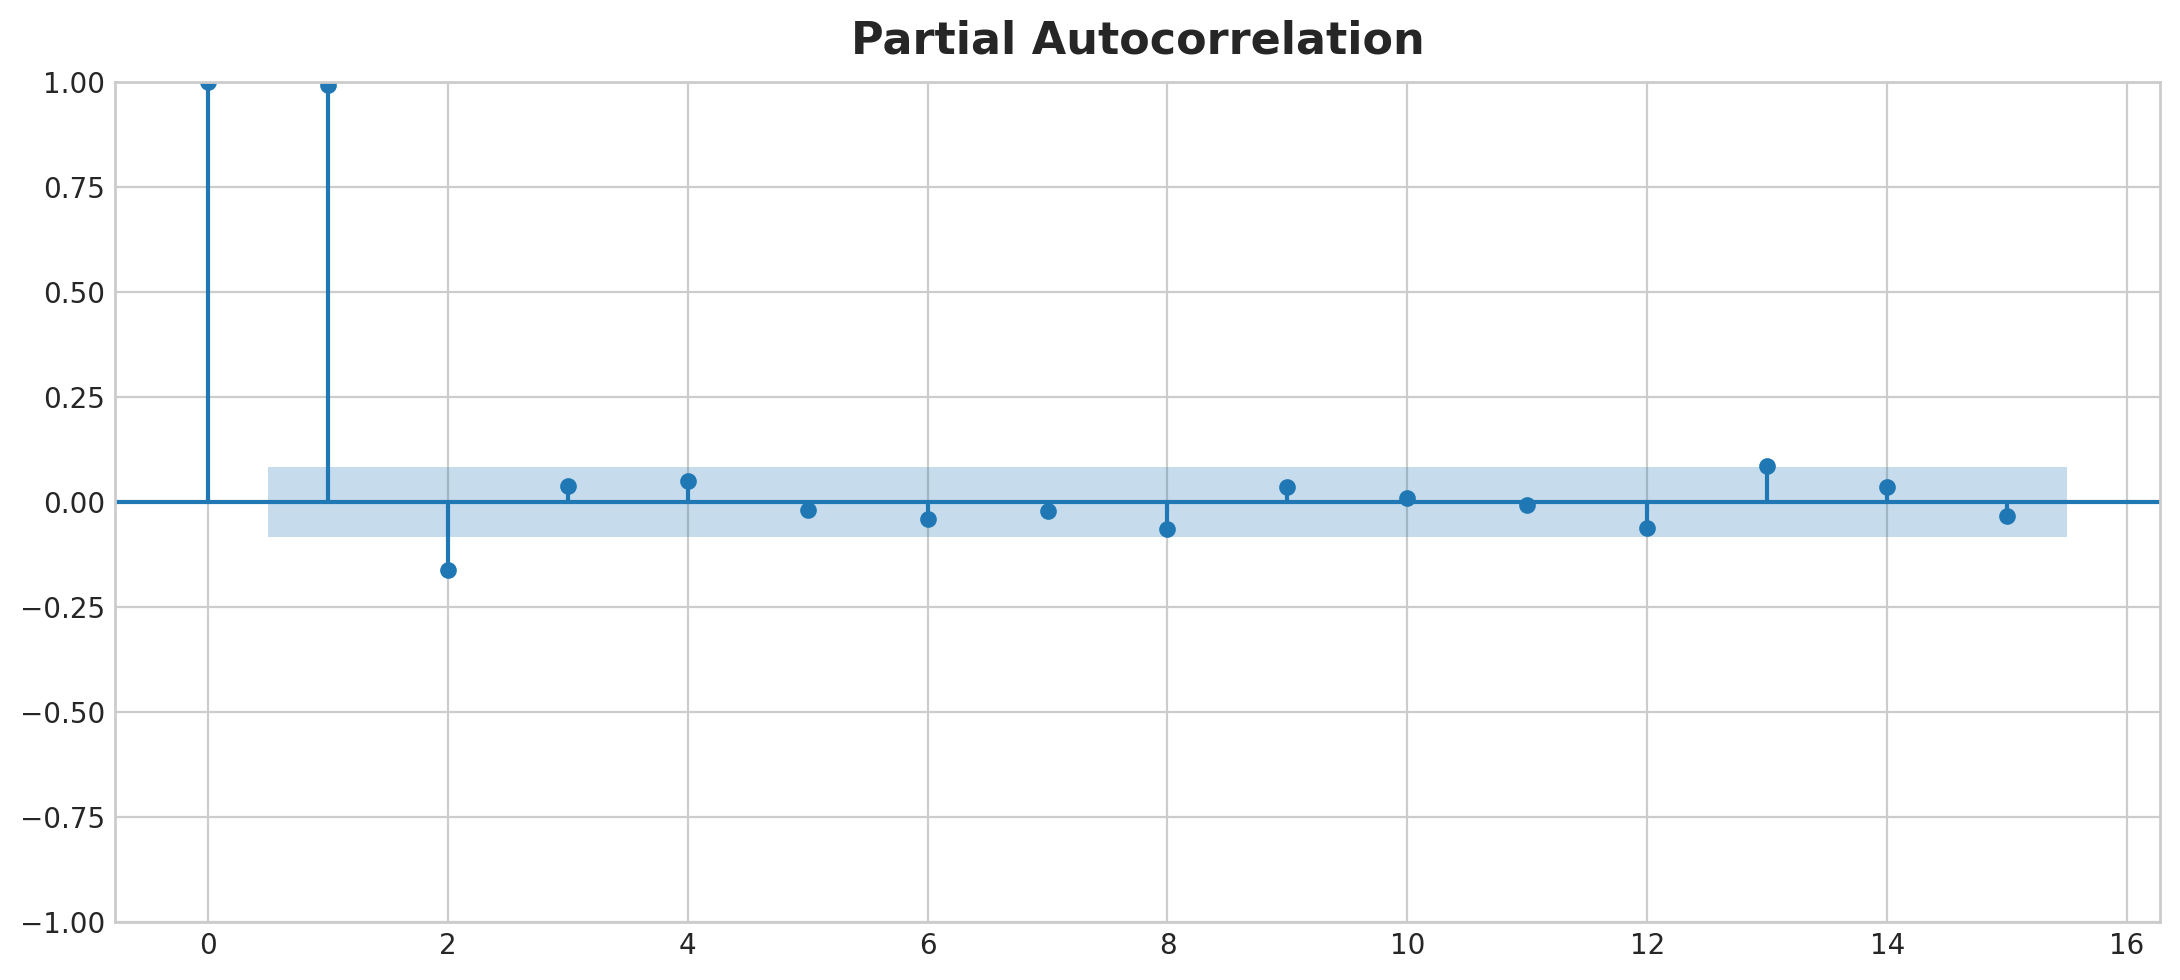

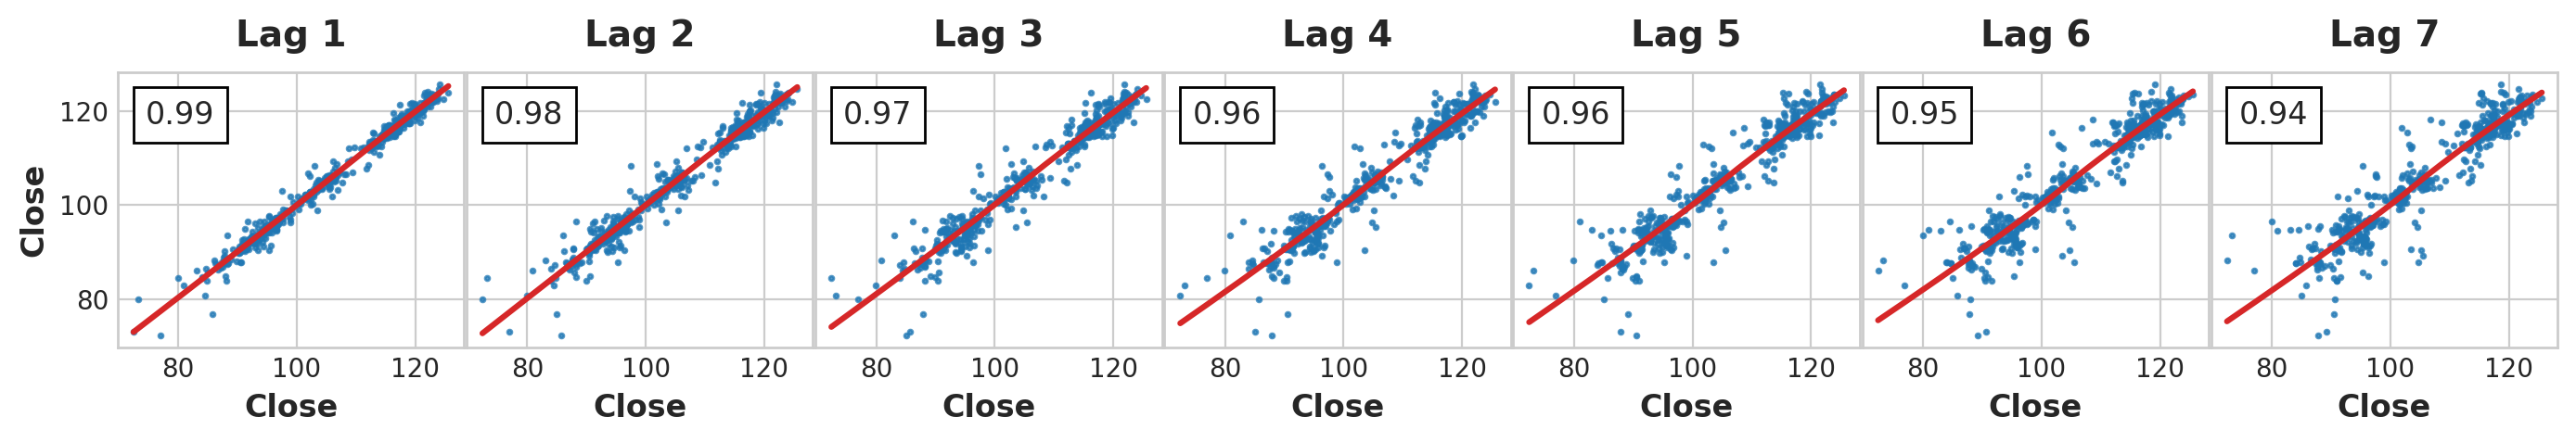

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(FPT.Close, lags=15);
plot_lags(FPT.Close, lags=7, nrows=1);
plot_pacf(MSN.Close, lags=15);
plot_lags(MSN.Close, lags=7, nrows=1);
plot_pacf(PNJ.Close, lags=15);
plot_lags(PNJ.Close, lags=7, nrows=1);
plot_pacf(VIC.Close, lags=15);
plot_lags(VIC.Close, lags=7, nrows=1);

                Close  week  day_of_week  month  day_of_month  year  \
Date/Time                                                             
2018-12-25  30.760000    52            1     12            25  2018   
2018-12-26  31.050159    52            2     12            26  2018   
2018-12-27  31.331567    52            3     12            27  2018   
2018-12-28  31.321557    52            4     12            28  2018   
2019-01-02  31.232393     1            2      1             2  2019   
...               ...   ...          ...    ...           ...   ...   
2020-12-16  57.203756    51            2     12            16  2020   
2020-12-17  56.720202    51            3     12            17  2020   
2020-12-18  56.811268    51            4     12            18  2020   
2020-12-21  57.387850    52            0     12            21  2020   
2020-12-22  57.586574    52            1     12            22  2020   

            day_of_year  week_of_year  
Date/Time                           

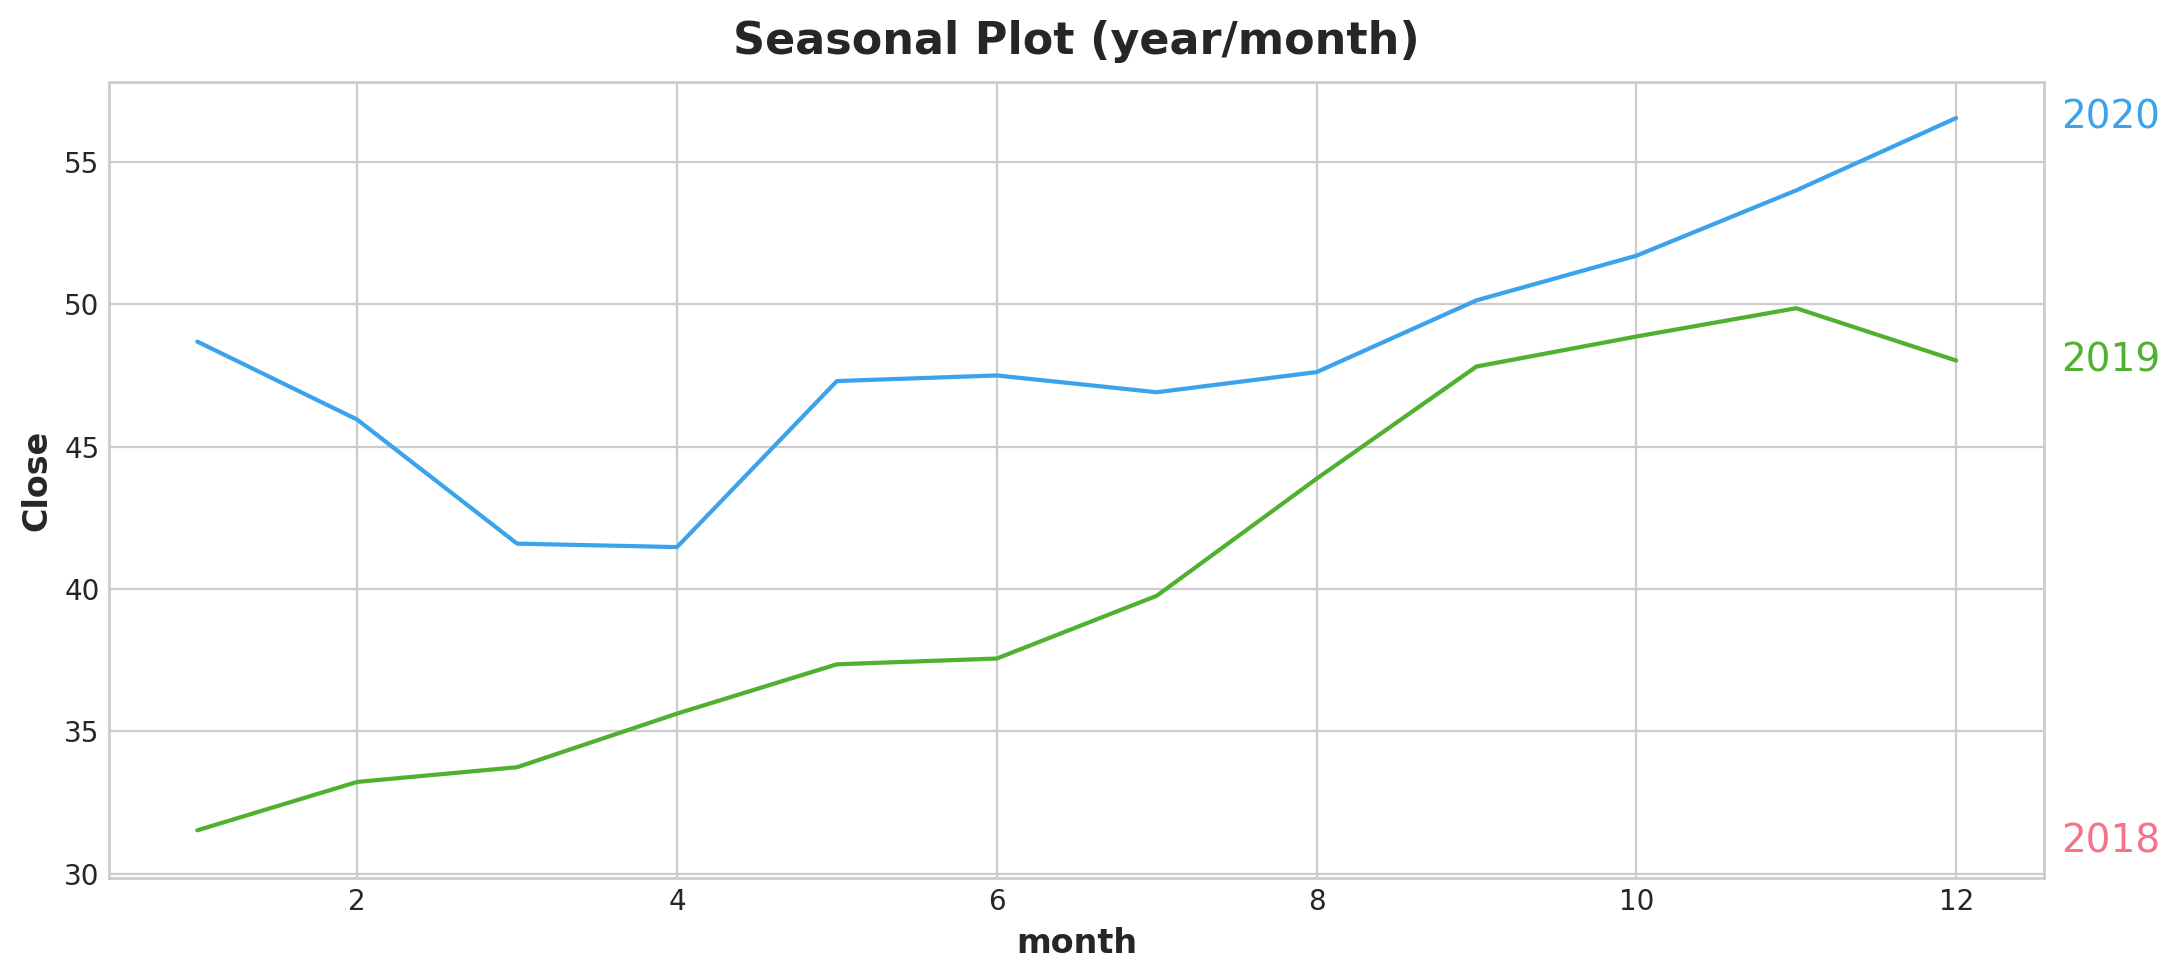

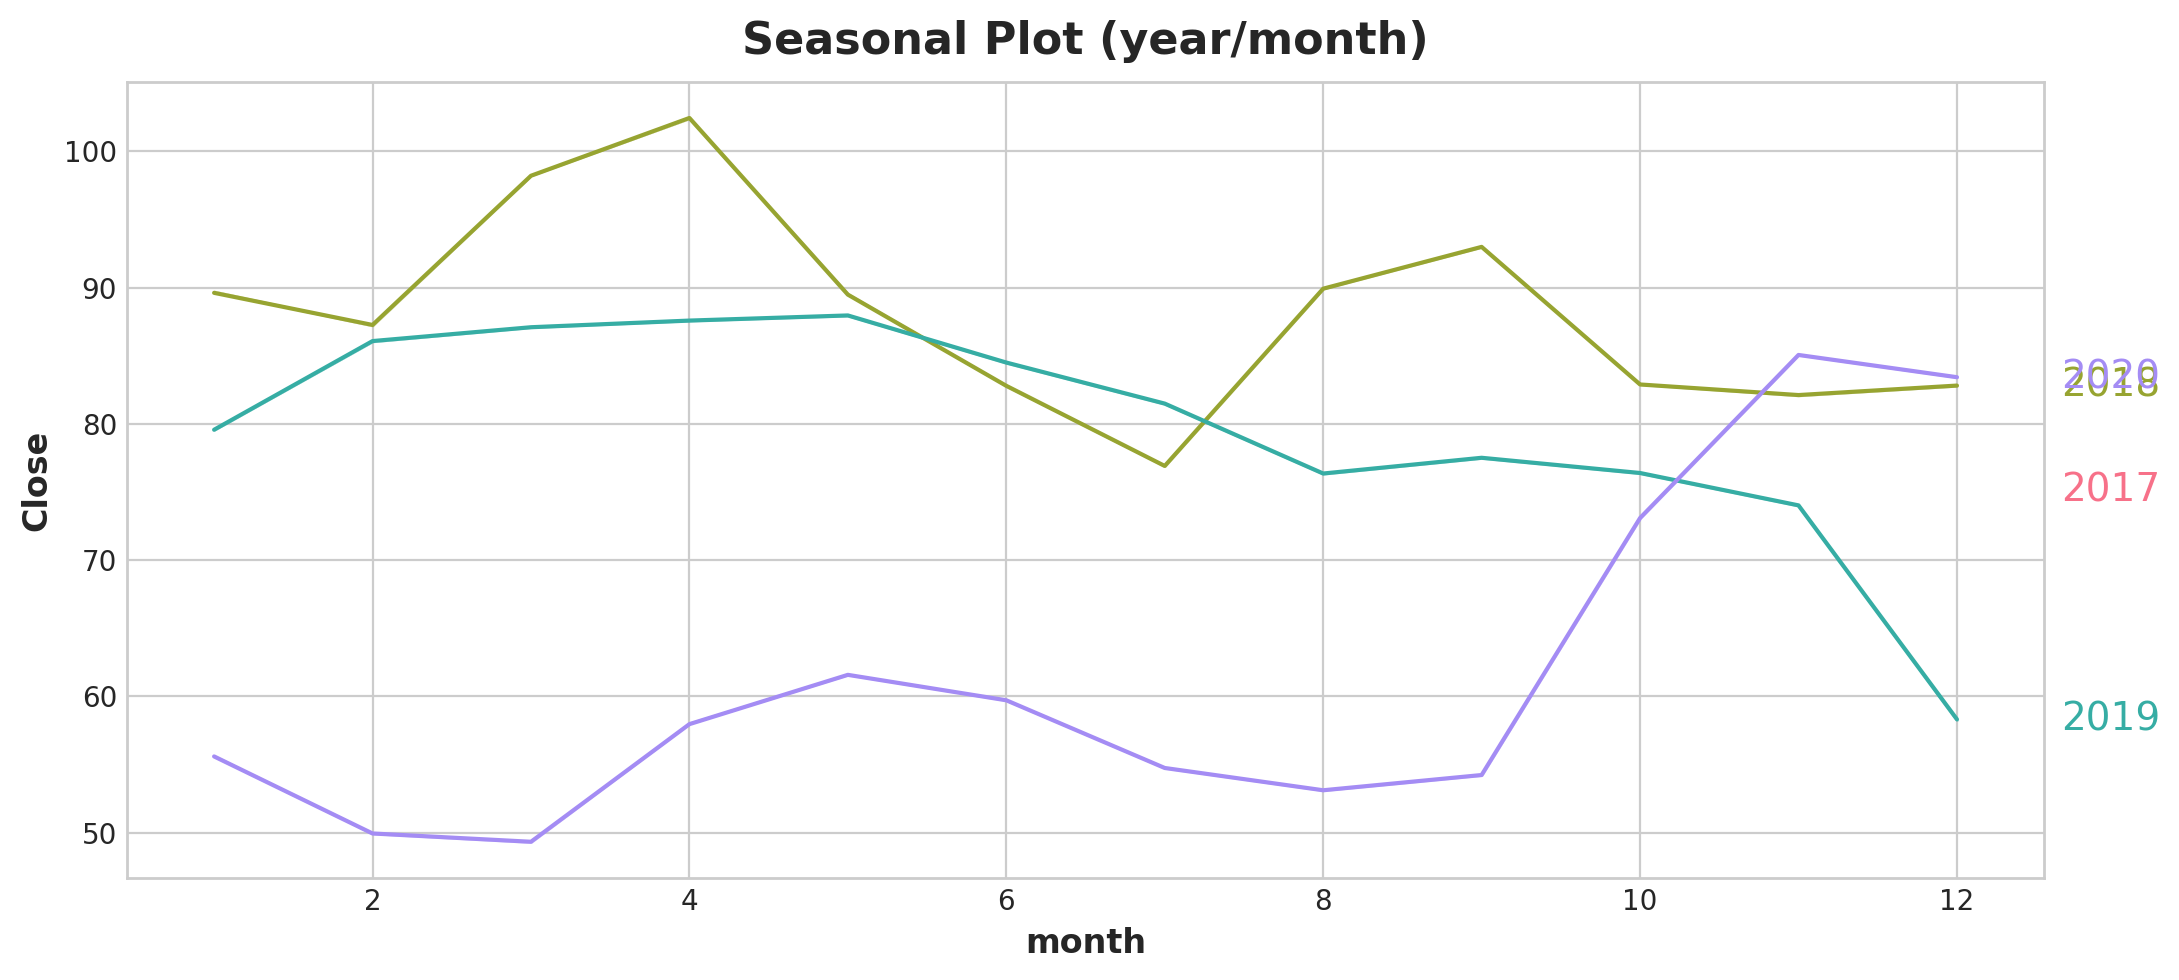

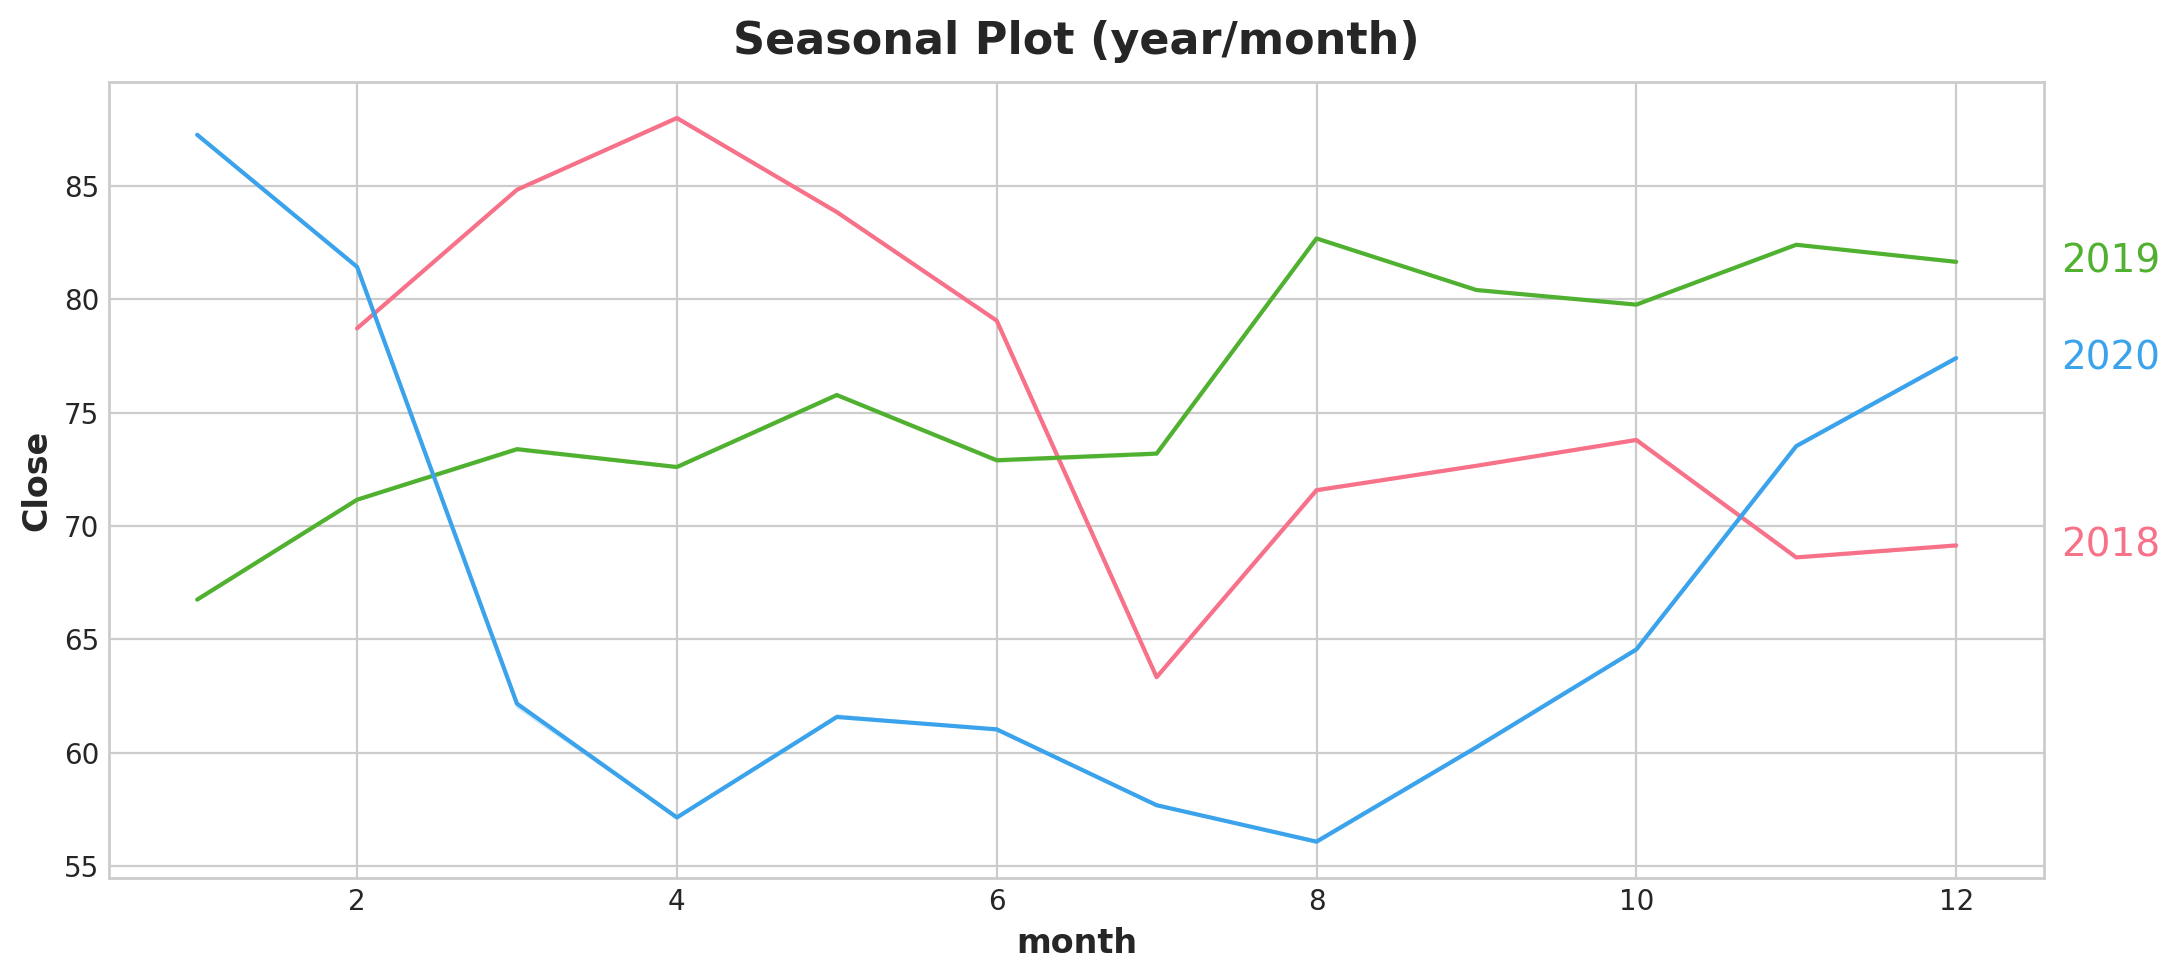

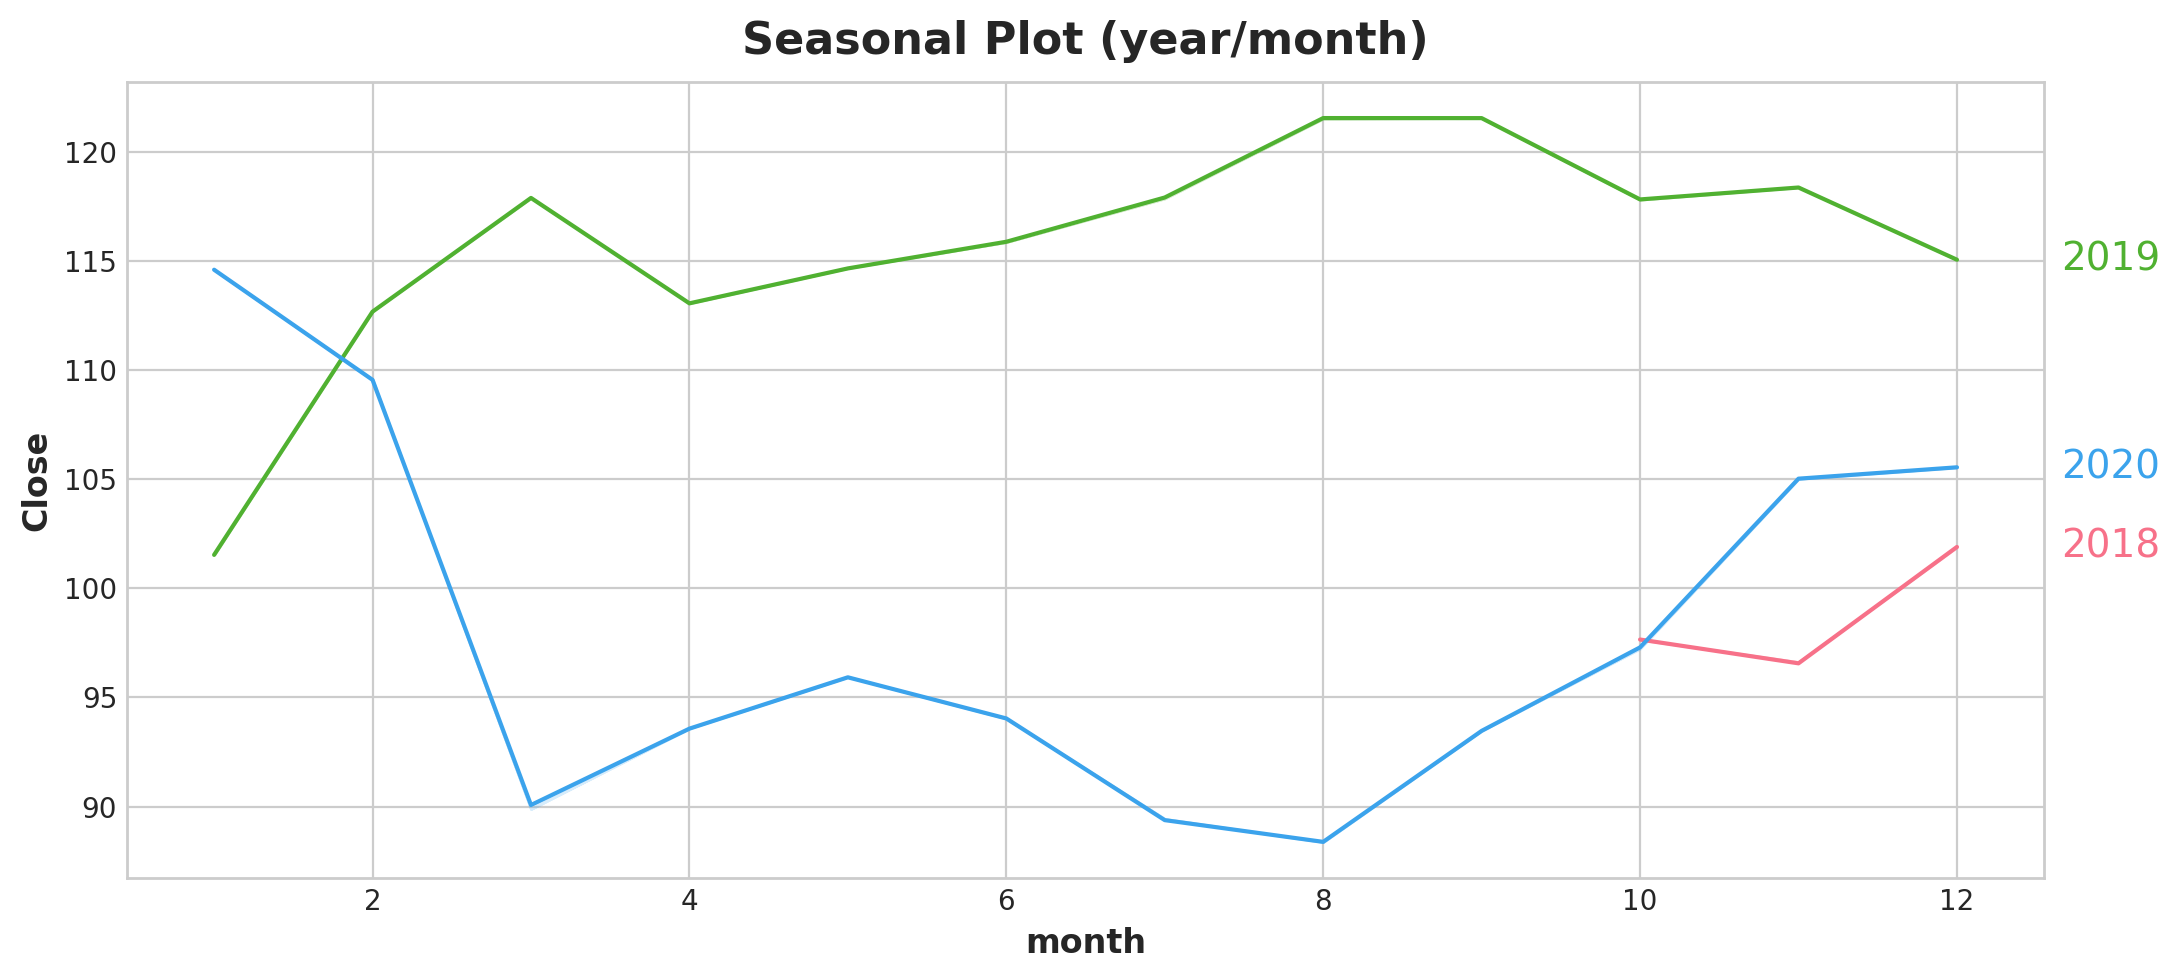

In [18]:
def process_and_plot_seasonal_data(data):
    # Thêm các yếu tố thời gian vào DataFrame
    data["week"] = data.index.week
    data["day_of_week"] = data.index.dayofweek
    data['month'] = data.index.month
    data['day_of_month'] = data.index.day
    data['year'] = data.index.year
    data['day_of_year'] = data.index.dayofyear
    data['week_of_year'] = data.index.weekofyear
    
    # In thông tin về DataFrame sau khi đã thêm các yếu tố thời gian
    print(data)
    
    # Vẽ biểu đồ theo mùa
    seasonal_plot(data, y='Close', period='year', freq='month')
process_and_plot_seasonal_data(FPT.Close.to_frame())
process_and_plot_seasonal_data(MSN.Close.to_frame())
process_and_plot_seasonal_data(PNJ.Close.to_frame())
process_and_plot_seasonal_data(VIC.Close.to_frame())

Từ biểu đồ ta thấy gia chứng khoán hầu như không theo 1 chu kì nhất định mà nó thường liên quan đến giá của các ngày liền kề 

# 3. Training FPT với LSTM

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2024-03-28 21:46:02.183240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 21:46:02.183339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 21:46:02.489864: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [126]:
features = ['Close', 'Open', 'High', 'Low', 'Volume']
target = FPT['Close']  # Định nghĩa target là cột 'Close'

# Chuẩn bị dữ liệu
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

scaled_FPT = scaler_X.fit_transform(FPT[features])
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))  # Reshape target để phù hợp với scaler

def create_dataset(data, target, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step : i])
        y.append(target[i])
    return np.array(X), np.array(y)
time_step = 50
X, y = create_dataset(scaled_FPT, scaled_target, time_step)


In [127]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=50, shuffle=False)

In [128]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2])

In [130]:
n_timestamps, n_features = X_train.shape[1], X_train.shape[2]

In [204]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(n_timestamps, n_features), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compile mô hình
model.compile(loss="mape", optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# Sử dụng early stopping
early_stop = EarlyStopping(monitor='val_loss', 
                           min_delta=0.0001,
                           patience=30,
                           restore_best_weights=True)

epochs = 100

model_history = model.fit(X_train, y_train, 
                          validation_data=(X_valid, y_valid),
                          epochs=epochs,
                          callbacks=[early_stop],
                          batch_size=32,
                          shuffle=True)


Epoch 1/100
 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 87.4249 - mae: 0.4786

W0000 00:00:1711672822.435418     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711672822.442390     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - loss: 66.8663 - mae: 0.3618

W0000 00:00:1711672829.213694     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 698ms/step - loss: 65.3903 - mae: 0.3538 - val_loss: 24.0242 - val_mae: 0.2128
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 21.4564 - mae: 0.0973 - val_loss: 4.4903 - val_mae: 0.0426
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 20.5420 - mae: 0.0980 - val_loss: 7.2740 - val_mae: 0.0674
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16.7546 - mae: 0.0818 - val_loss: 9.5225 - val_mae: 0.0862
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.6230 - mae: 0.0899 - val_loss: 10.3935 - val_mae: 0.0938
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16.6712 - mae: 0.0825 - val_loss: 6.4302 - val_mae: 0.0590
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.0563 - mae: 0.0728 - val_loss: 11.3675 - val_mae: 0.1015
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.8359 - mae: 0.0766 - val_loss: 10.7210 - val_mae: 0.0963
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - 

In [205]:
print(model.summary())


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                  │ (None, 50, 256)        │       268,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 50, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 50, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_56 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,544,645 (5.89 MB)

 Trainable params: 514,881 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,029,764 (3.93 MB)

None


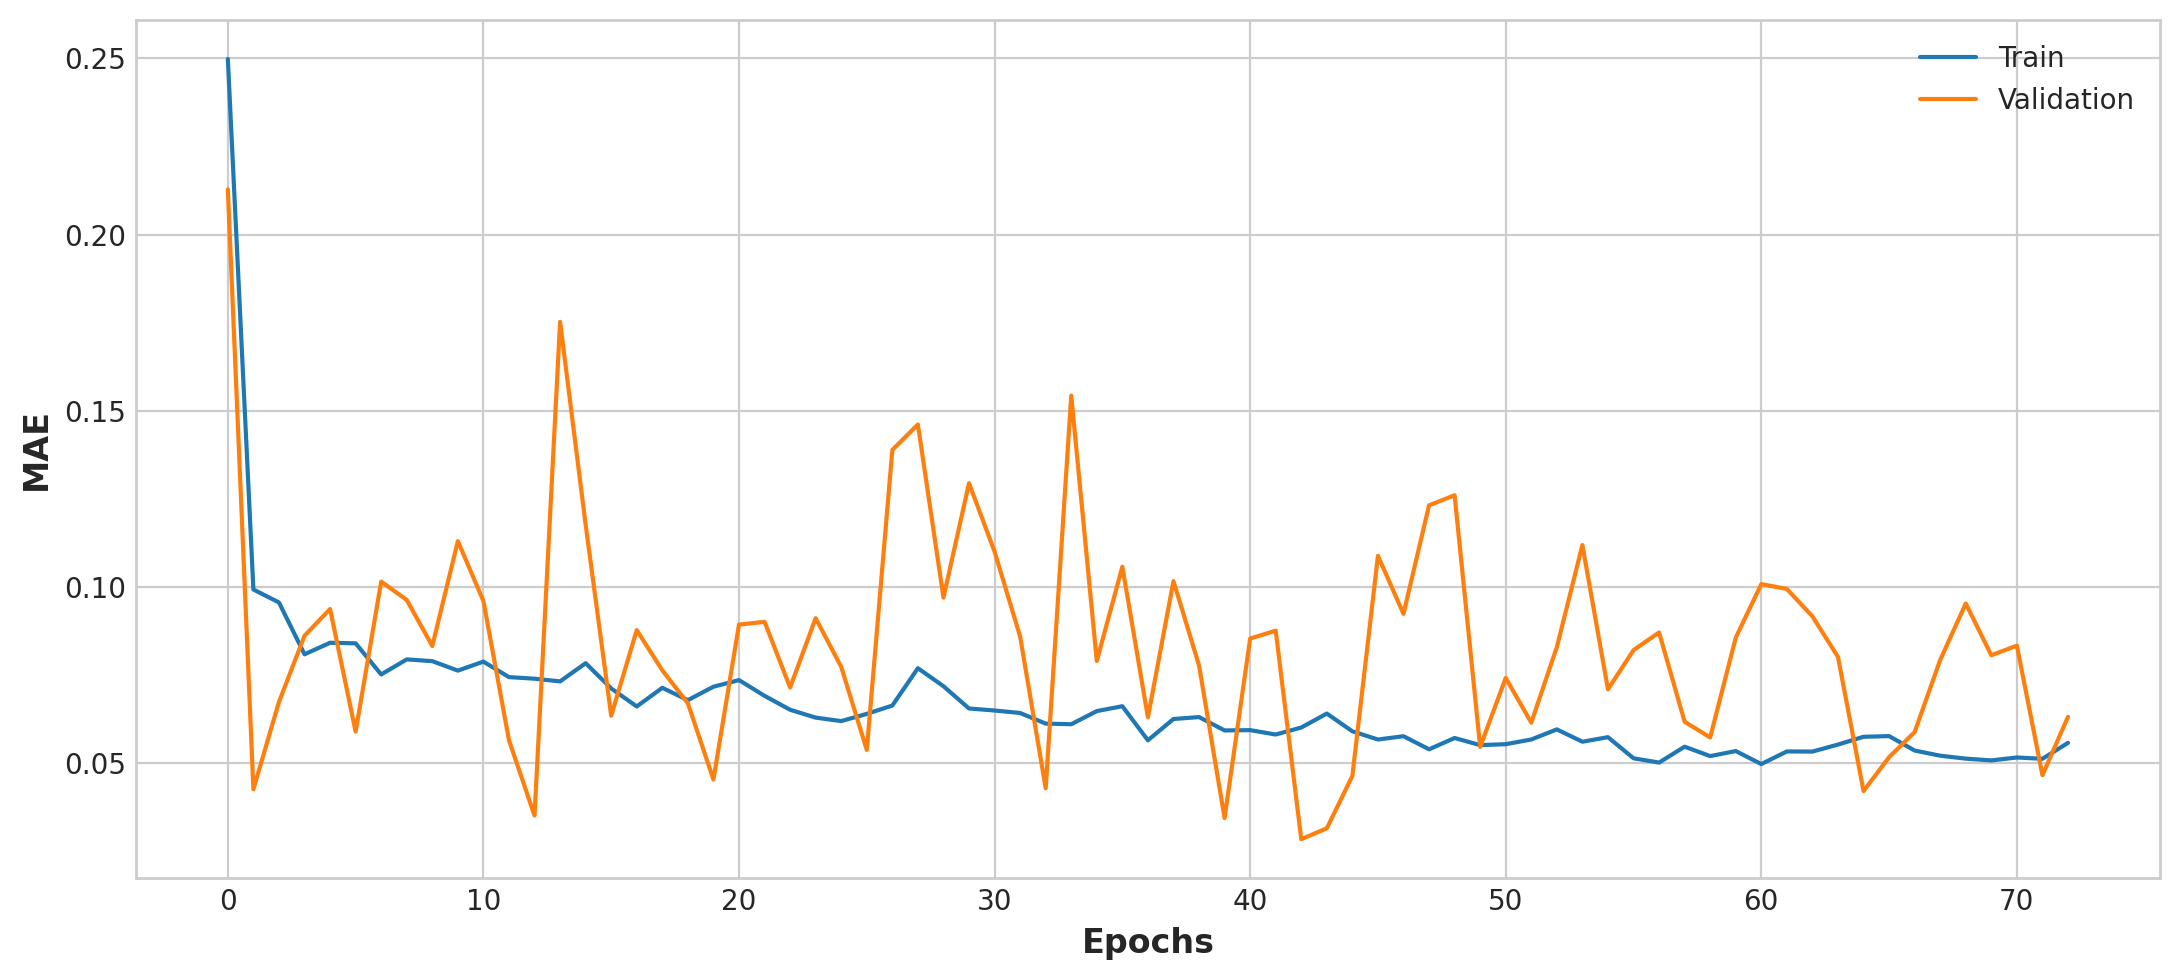

In [206]:
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(['Train', 'Validation'])
plt.show()

In [219]:
from sklearn.metrics import mean_absolute_error
# Dự đoán trên tập huấn luyện và tập xác thực
y_train_pred = scaler_target.inverse_transform(model.predict(X_train))
y_valid_pred = scaler_target.inverse_transform(model.predict(X_valid))
y_train_value = scaler_target.inverse_transform(y_train.reshape(-1, 1))
y_valid_value = scaler_target.inverse_transform(y_valid.reshape(-1, 1))
# Tính toán MAPE trên tập huấn luyện và tập xác thực
mape_train = np.mean(np.abs((y_train_pred - y_train_value) / y_train_value)) * 100
mape_valid = np.mean(np.abs((y_valid_pred - y_valid_value) / y_valid_value)) * 100
# Tính toán MAE trên tập huấn luyện và tập xác thực
mae_train = mean_absolute_error(y_train_value, y_train_pred)
mae_valid = mean_absolute_error(y_valid_value, y_valid_pred)
# In ra giá trị MAPE và MAE trên cả tập huấn luyện và tập xác thực
print('MAPE on training set (original scale)%:', mape_train)
print('Mean Absolute Error (MAE) on training set:', mae_train)
print('MAPE on validation set (original scale)%:', mape_valid)
print('Mean Absolute Error (MAE) on validation set:', mae_valid)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
MAPE on training set (original scale)%: 2.2380737993382267
Mean Absolute Error (MAE) on training set: 0.9928554180361399
MAPE on validation set (original scale)%: 1.4291865057092414
Mean Absolute Error (MAE) on validation set: 0.7706316424177779


In [221]:
# Tạo DataFrame từ dự đoán và giá trị thực tế trên tập xác thực
y_valid_pred_df = pd.DataFrame(y_valid_pred, columns=['Close'], index=FPT.index[-50:])
y_valid_value_df =pd.DataFrame(y_valid_value, columns=['Close'], index=FPT.index[-50:])

# Lấy dữ liệu tương ứng từ tập huấn luyện
y_train_pred_df = pd.DataFrame(y_train_pred, columns=['Close'], index=FPT.index[50:-50])
y_train_value_df = pd.DataFrame(y_train_value, columns=['Close'], index=FPT.index[50:-50])



## So sánh với giá dự đoán 

kiểm tra đúng index chưa

In [222]:
# Nối hai DataFrame theo cột index
result_df1 = y_valid_pred_df.join(y_valid_value_df.Close, lsuffix='_predicted', rsuffix='_value')
result_df1= result_df1.join(FPT[-50:].Close)
result_df2=y_train_pred_df.join(y_train_value_df, lsuffix='_predicted', rsuffix='_value')
result_df2=result_df2.join(FPT[50:-50].Close, lsuffix='_predicted', rsuffix='_value')
# In ra 5 dòng đầu của DataFrame kết quả
print(result_df1.tail())
print(result_df2.head())

            Close_predicted  Close_value      Close
Date/Time                                          
2020-12-16        56.799305    57.203756  57.203756
2020-12-17        56.940323    56.720202  56.720202
2020-12-18        56.944248    56.811268  56.811268
2020-12-21        56.828484    57.387850  57.387850
2020-12-22        56.754158    57.586574  57.586574
            Close_predicted  Close_value      Close
Date/Time                                          
2019-03-14        34.300655    34.474150  34.474150
2019-03-15        34.305431    34.272468  34.272468
2019-03-18        34.311420    34.380215  34.380215
2019-03-19        34.319687    34.328750  34.328750
2019-03-20        34.330585    33.957911  33.957911


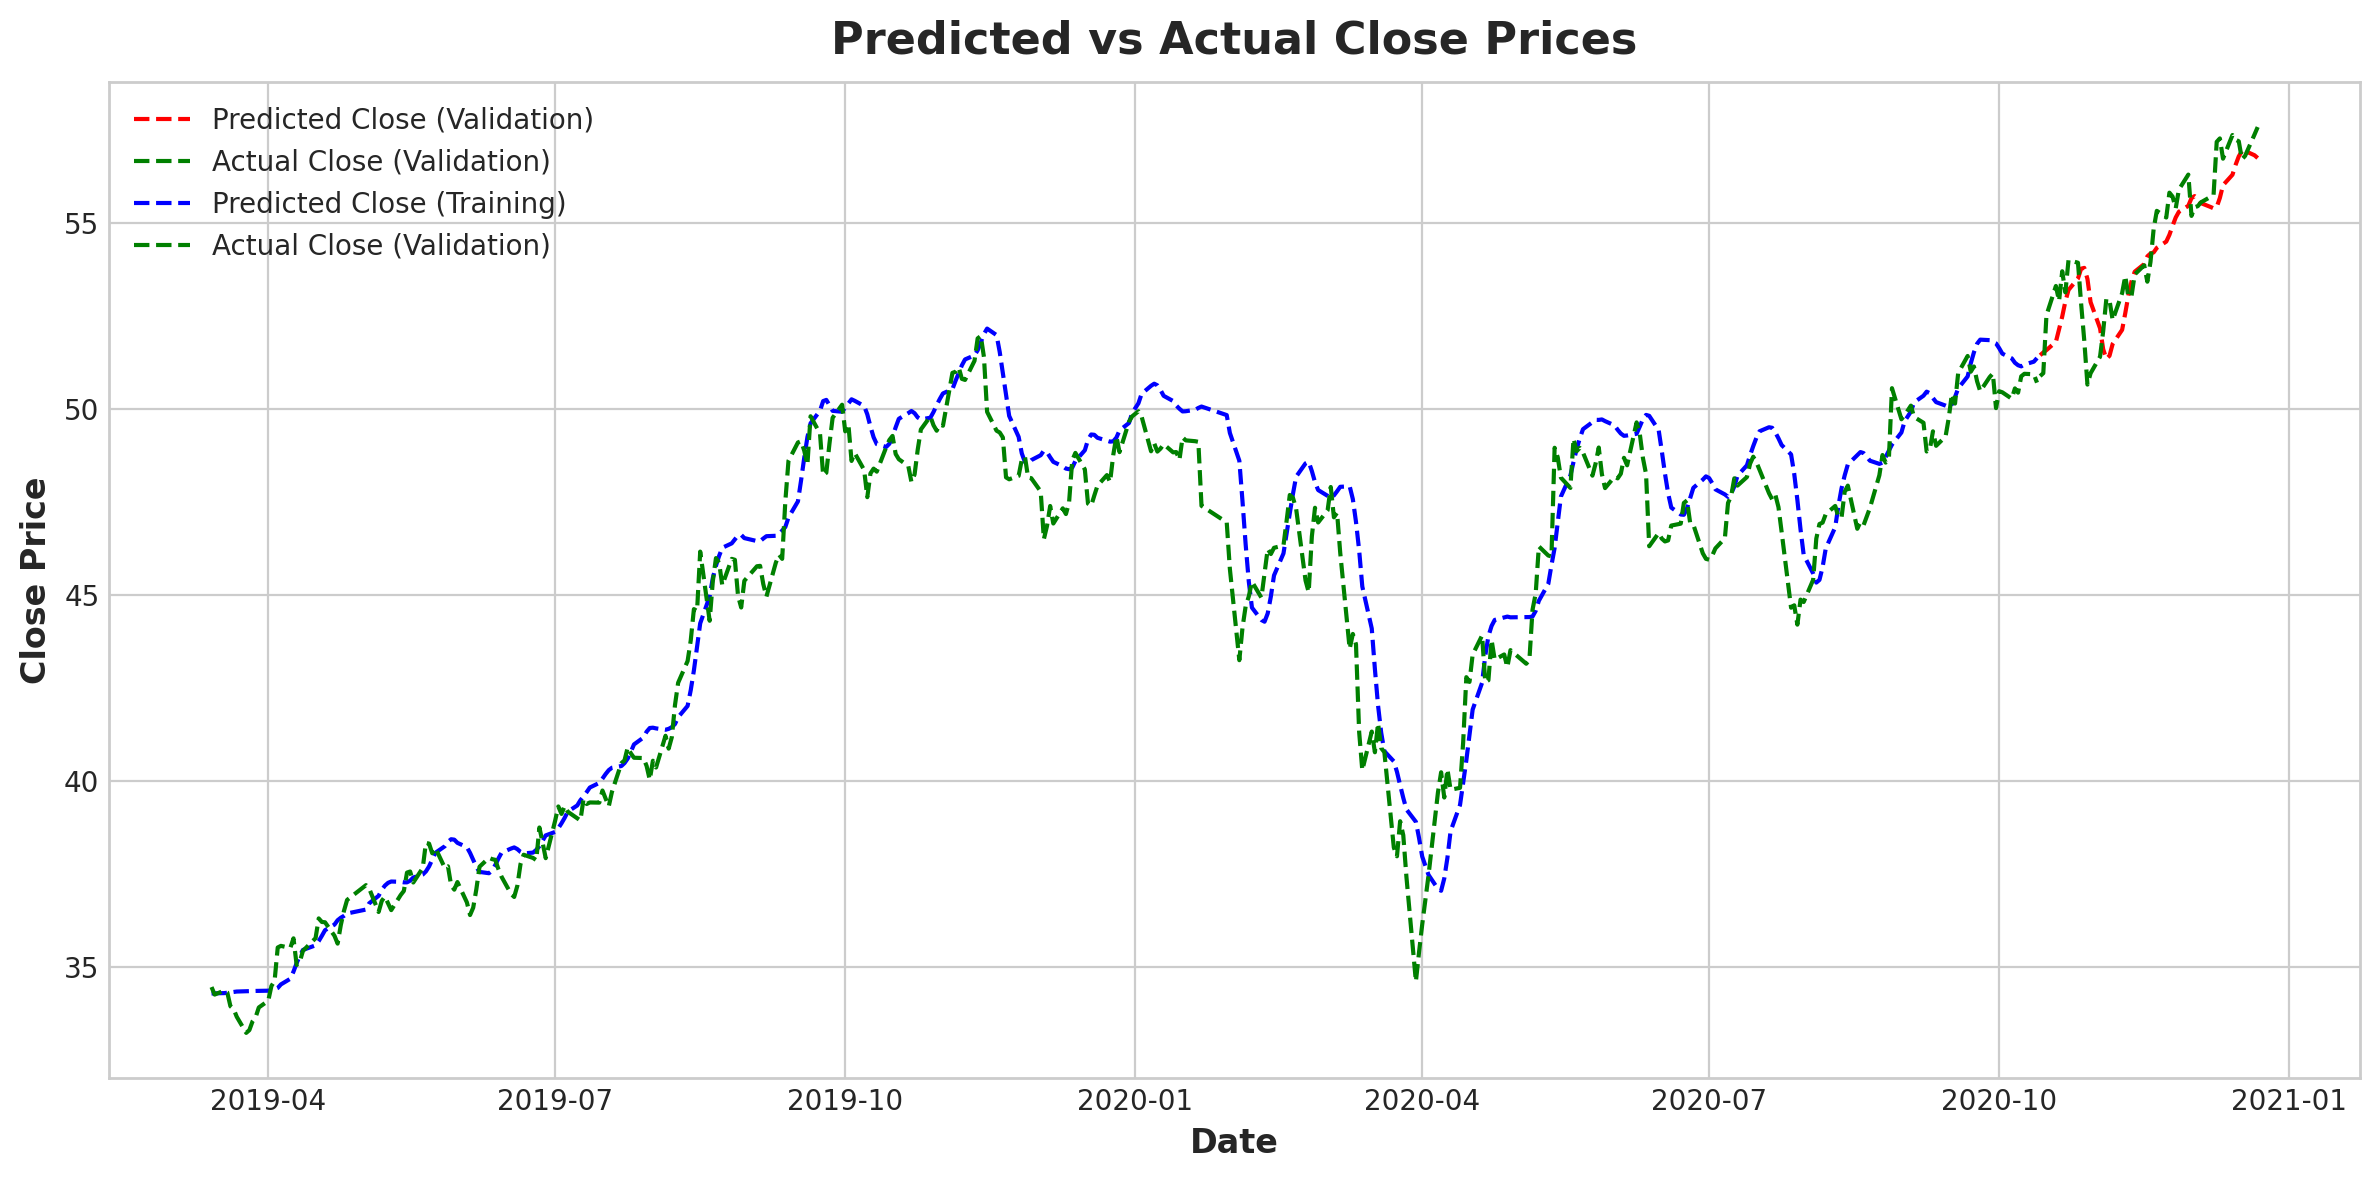

In [225]:


# Plotting predicted and actual values for both validation and training sets
plt.figure(figsize=(12, 6))

# Validation set
plt.plot(result_df1.index.to_timestamp(), result_df1['Close_predicted'], label='Predicted Close (Validation)', color='red', linestyle='--')
plt.plot(result_df1.index.to_timestamp(), result_df1['Close_value'], label='Actual Close (Validation)', color='green', linestyle='--')

# Training set
plt.plot(result_df2.index.to_timestamp(), result_df2['Close_predicted'], label='Predicted Close (Training)', color='blue', linestyle='--')
plt.plot(result_df2.index.to_timestamp(), result_df2['Close_value'], label='Actual Close (Validation)', color='green', linestyle='--')
plt.title('Predicted vs Actual Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Dự đoán giá đóng ngày hôm sau của FPT  

In [224]:
input = scaled_FPT[-n_timestamps:]
input_sequence = input_sequence.reshape(1, n_timestamps, n_features)

# Sử dụng mô hình đã huấn luyện để thực hiện dự đoán
predicted_prices_scaled = model.predict(input_sequence)

# Tùy chọn, đảo ngược chuyển đổi các giá trị dự đoán để nhận được các giá trị dự đoán thực tế
predicted_prices = scaler_target.inverse_transform(predicted_prices_scaled)

# In ra các giá trị dự đoán
print("Giá trị dự đoán cho các timestamp trong tương lai:")
print(predicted_prices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Giá trị dự đoán cho các timestamp trong tương lai:
[[56.750195]]


# 4. Training FPT với mô hình boosting + lagfeature

## tạo lagfeature để tạo tính năng liên hệ ngày hôm qua vì ngày hôm qua có tương quan cao với ngày hiện tại

In [227]:
target = FPT['Close']

### tôi sẽ tạo mô hình dự đoán giá đóng cửa trước một tuần 

In [308]:
Close_lag_step=  make_lags(target,lags=7,name='Close').dropna()
target_next_7=make_multistep_target(target, 7,name='Close').dropna()

In [309]:
Close_lag_step

,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Close_lag_6,Close_lag_7
Date/Time,,,,,,,
2019-01-07,30.522963,30.578619,31.232393,31.321557,31.331567,31.050159,30.760000
2019-01-08,31.240211,30.522963,30.578619,31.232393,31.321557,31.331567,31.050159
2019-01-09,31.211389,31.240211,30.522963,30.578619,31.232393,31.321557,31.331567
2019-01-10,31.548952,31.211389,31.240211,30.522963,30.578619,31.232393,31.321557
2019-01-11,31.573883,31.548952,31.211389,31.240211,30.522963,30.578619,31.232393
...,...,...,...,...,...,...,...
2020-12-16,57.247465,57.372330,56.736765,57.281373,57.188991,55.755556,55.708451
2020-12-17,57.203756,57.247465,57.372330,56.736765,57.281373,57.188991,55.755556
2020-12-18,56.720202,57.203756,57.247465,57.372330,56.736765,57.281373,57.188991


In [310]:
target_next_7

,Close_step_1,Close_step_2,Close_step_3,Close_step_4,Close_step_5,Close_step_6,Close_step_7
Date/Time,,,,,,,
2018-12-25,30.760000,31.050159,31.331567,31.321557,31.232393,30.578619,30.522963
2018-12-26,31.050159,31.331567,31.321557,31.232393,30.578619,30.522963,31.240211
2018-12-27,31.331567,31.321557,31.232393,30.578619,30.522963,31.240211,31.211389
2018-12-28,31.321557,31.232393,30.578619,30.522963,31.240211,31.211389,31.548952
2019-01-02,31.232393,30.578619,30.522963,31.240211,31.211389,31.548952,31.573883
...,...,...,...,...,...,...,...
2020-12-08,55.755556,57.188991,57.281373,56.736765,57.372330,57.247465,57.203756
2020-12-09,57.188991,57.281373,56.736765,57.372330,57.247465,57.203756,56.720202
2020-12-10,57.281373,56.736765,57.372330,57.247465,57.203756,56.720202,56.811268


In [311]:
X = FPT.merge(Close_lag_step, left_on=["Date/Time"], right_on=["Date/Time"], how="left").dropna()

In [312]:
X=X.drop(columns=['Close'])
X

,Open,High,Low,Volume,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Close_lag_6,Close_lag_7
Date/Time,,,,,,,,,,,
2019-01-07,31.237465,31.244155,31.234014,408470,30.522963,30.578619,31.232393,31.321557,31.331567,31.050159,30.760000
2019-01-08,31.211389,31.213519,31.207222,295660,31.240211,30.522963,30.578619,31.232393,31.321557,31.331567,31.050159
2019-01-09,31.551935,31.554032,31.546935,309040,31.211389,31.240211,30.522963,30.578619,31.232393,31.321557,31.331567
2019-01-10,31.576019,31.578544,31.570583,207330,31.548952,31.211389,31.240211,30.522963,30.578619,31.232393,31.321557
2019-01-11,31.631034,31.636069,31.623448,596090,31.573883,31.548952,31.211389,31.240211,30.522963,30.578619,31.232393
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,57.208920,57.230047,57.183568,1995530,57.247465,57.372330,56.736765,57.281373,57.188991,55.755556,55.708451
2020-12-17,56.720202,56.744949,56.688384,3594500,57.203756,57.247465,57.372330,56.736765,57.281373,57.188991,55.755556
2020-12-18,56.810329,56.833803,56.784507,1532820,56.720202,57.203756,57.247465,57.372330,56.736765,57.281373,57.188991


In [313]:
X_pred=X.loc["2020-12-15":]
X= X.loc['2019-01-07':"2020-12-14"]
y=target_next_7.loc['2019-01-07':"2020-12-14"]

In [314]:
from sklearn.multioutput import RegressorChain
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [320]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=7, shuffle=False)

In [254]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def objective(trial):
    # Define hyperparameters to be optimized
    xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        # Add other hyperparameters here
    }
    
    # Create RegressorChain with XGBRegressor as base estimator
    model = RegressorChain(base_estimator=XGBRegressor(**xgb_params))
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_valid)
    
    # Calculate MAPE
    mape_score = mape(y_valid, y_pred)
    
    return mape_score

In [316]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50,show_progress_bar=True)

# Get best hyperparameters
best_params = study.best_params
best_mape = study.best_value

print('Best MAPE:', best_mape)
print('Best hyperparameters:', best_params)

[I 2024-03-29 02:22:02,500] A new study created in memory with name: no-name-c95304c3-bf29-4cc7-9074-5673cbc22a98


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-03-29 02:22:03,849] Trial 0 finished with value: 15.770193721795634 and parameters: {'n_estimators': 114, 'max_depth': 8, 'learning_rate': 0.011619328243370744}. Best is trial 0 with value: 15.770193721795634.
[I 2024-03-29 02:22:06,851] Trial 1 finished with value: 1.793746205380984 and parameters: {'n_estimators': 257, 'max_depth': 5, 'learning_rate': 0.03803343017562283}. Best is trial 1 with value: 1.793746205380984.
[I 2024-03-29 02:22:11,440] Trial 2 finished with value: 1.750593553689919 and parameters: {'n_estimators': 484, 'max_depth': 6, 'learning_rate': 0.019922184424526562}. Best is trial 2 with value: 1.750593553689919.
[I 2024-03-29 02:22:12,910] Trial 3 finished with value: 1.729694684544504 and parameters: {'n_estimators': 245, 'max_depth': 4, 'learning_rate': 0.04614746763342613}. Best is trial 3 with value: 1.729694684544504.
[I 2024-03-29 02:22:21,801] Trial 4 finished with value: 1.728552449025883 and parameters: {'n_estimators': 951, 'max_depth': 6, 'learni

In [317]:
best_regressor = RegressorChain(base_estimator=XGBRegressor(**best_params))
best_regressor.fit(X_train, y_train)
y_fit = pd.DataFrame(best_regressor.predict(X_train), index=X_train.index, columns=y_train.columns)
y_pred = pd.DataFrame(best_regressor.predict(X_valid), index=X_valid.index, columns=y_valid.columns)

In [318]:
y_pred

,Close_step_1,Close_step_2,Close_step_3,Close_step_4,Close_step_5,Close_step_6,Close_step_7
Date/Time,,,,,,,
2020-12-04,55.471771,55.623421,55.820774,55.496162,56.747875,57.274643,56.673931
2020-12-07,55.486080,55.624035,55.682327,55.431389,56.747875,57.274643,56.706535
2020-12-08,55.700699,55.697720,55.547951,55.636131,55.568512,55.739208,55.769066
2020-12-09,56.216869,55.700249,55.429111,55.648636,56.733833,56.728500,56.732071
2020-12-10,56.301525,55.199394,55.428158,55.478756,56.709232,56.974110,56.741772
2020-12-11,56.265839,55.655964,55.599010,55.563862,56.732246,57.129440,56.729759
2020-12-14,56.121479,55.655964,55.687565,55.334362,56.747612,57.166969,56.467442


In [321]:
from sklearn.metrics import mean_absolute_error

# Tính MAE trên tập train và test
train_mae = mean_absolute_error(y_train, y_fit)
test_mae = mean_absolute_error(y_valid, y_pred)

# In kết quả
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
# Tính MAPE trên tập train và test
train_mape = np.mean(np.abs((y_train - y_fit) / y_train)) * 100
test_mape = np.mean(np.abs((y_valid - y_pred) / y_valid)) * 100

# In kết quả
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")


Train MAE: 0.07
Test MAE: 0.91
Train MAPE: 0.16%
Test MAPE: 1.59%


### có thể thấy mô hình tốt ngang hơn mô hình LSTM dù dự đoán nhiều bước thời gian hơn 
bên dưới là so sánh kết quả trên dữ liệu thực và dự đoán

In [322]:
def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

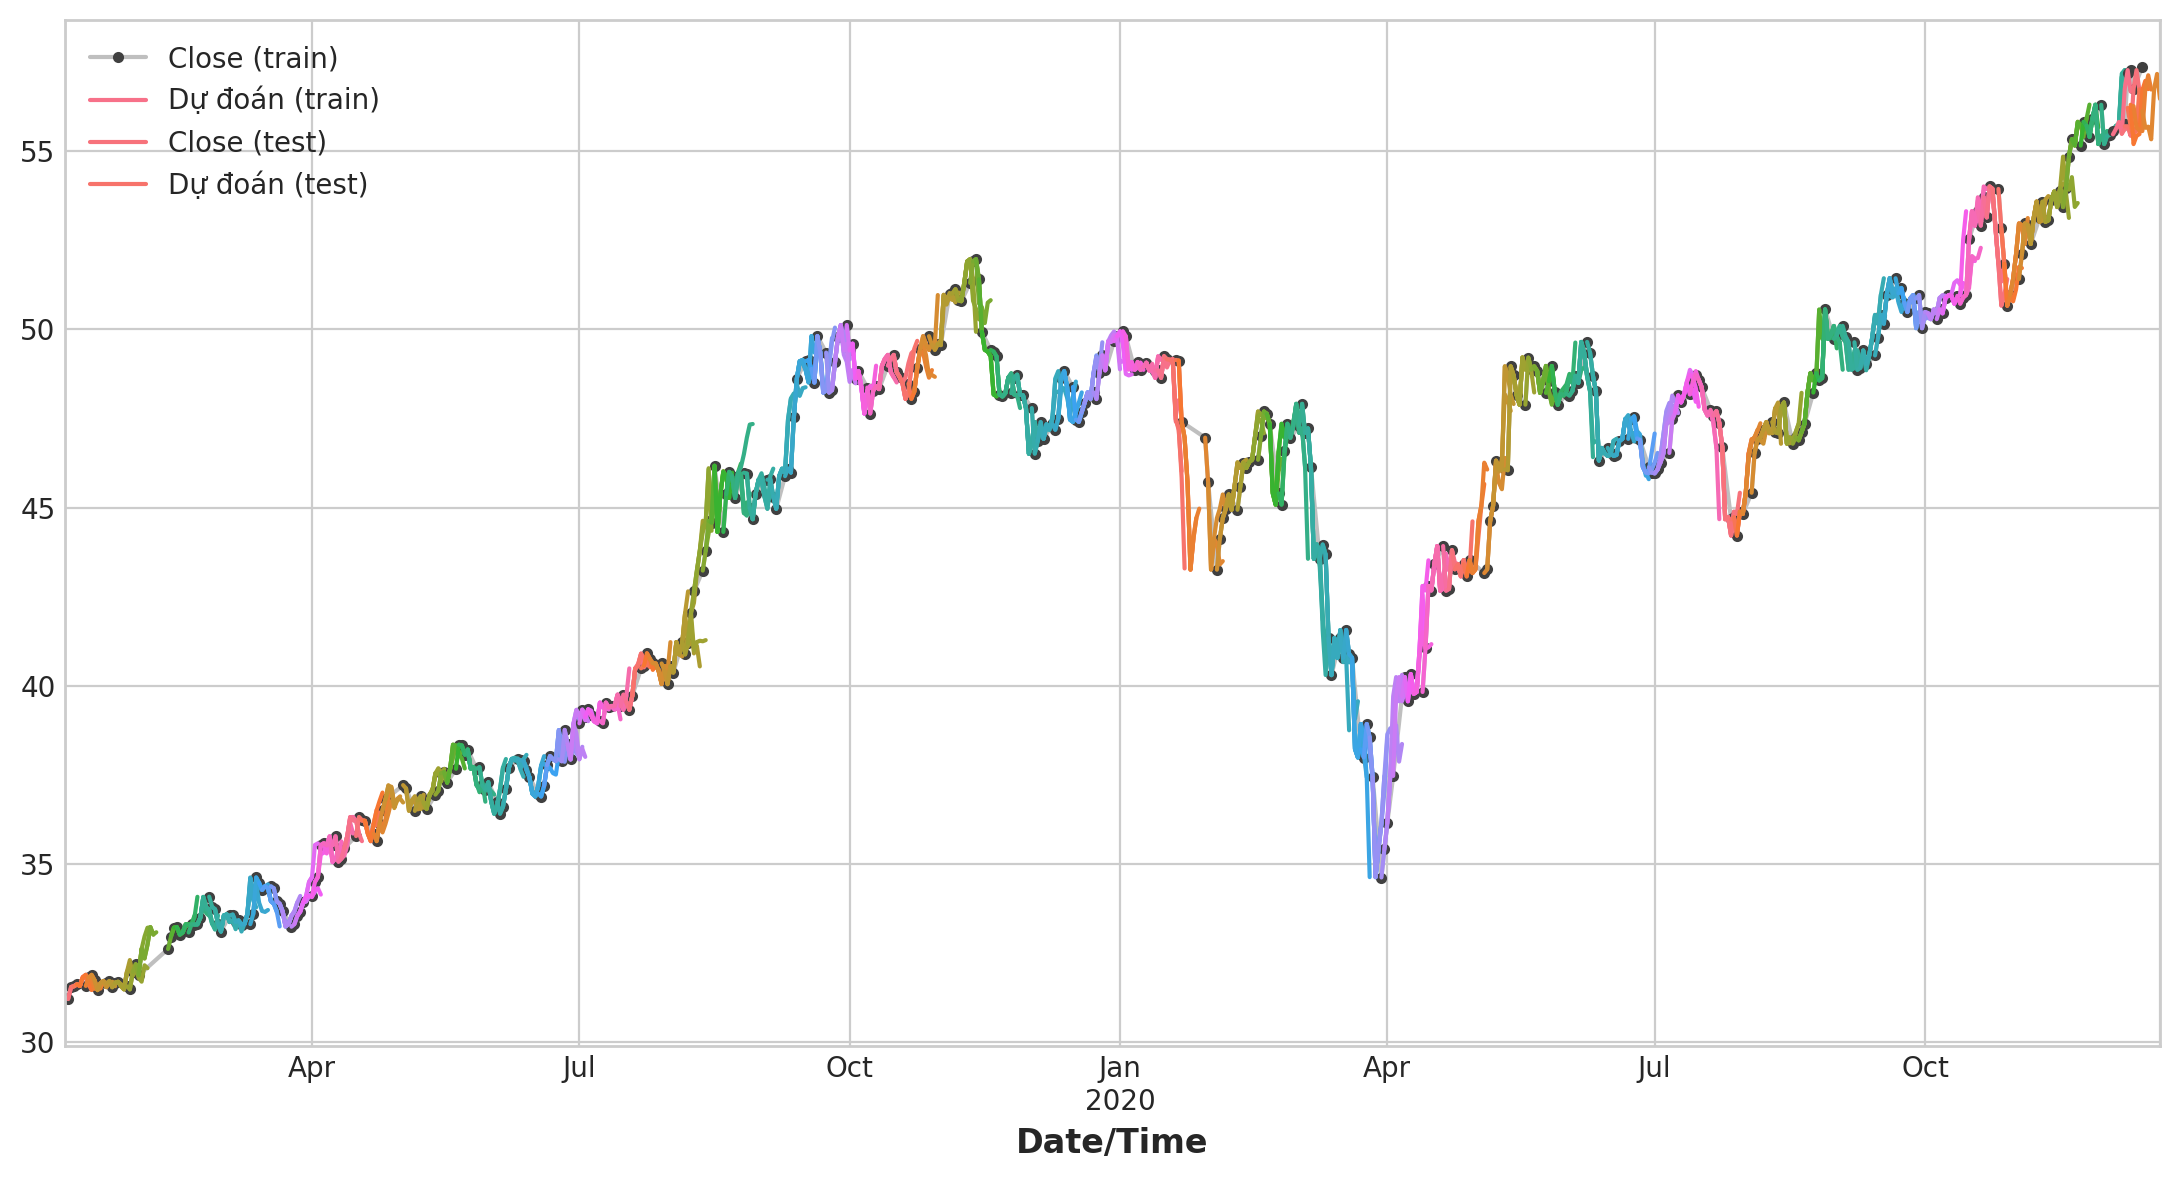

In [323]:
palette = dict(palette='husl', n_colors=64)
fig, ax = plt.subplots(figsize=(11, 6))

# Vẽ biểu đồ cho dữ liệu train
ax = FPT.Close[y_fit.index].plot(ax=ax, **plot_params)
ax = plot_multistep(y_fit, ax=ax, palette_kwargs=palette)

# Vẽ biểu đồ cho dữ liệu test
ax = FPT.Close[y_pred.index].plot(ax=ax, **plot_params)
ax = plot_multistep(y_pred, ax=ax, palette_kwargs=palette)

# Thêm chú thích
_ = ax.legend(['Close (train)', 'Dự đoán (train)', 'Close (test)', 'Dự đoán (test)'])


In [327]:
merged_df = FPT["2020-12-14":].merge(y_pred, left_on=["Date/Time"], right_on=["Date/Time"], how="left")


In [328]:
merged_df

,Open,High,Low,Close,Volume,Close_step_1,Close_step_2,Close_step_3,Close_step_4,Close_step_5,Close_step_6,Close_step_7
Date/Time,,,,,,,,,,,,
2020-12-14,57.372330,57.398544,57.343204,57.372330,1443760,56.121479,55.655964,55.687565,55.334362,56.747612,57.166969,56.467442
2020-12-15,57.242396,57.265438,57.223963,57.247465,2666900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-16,57.208920,57.230047,57.183568,57.203756,1995530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-17,56.720202,56.744949,56.688384,56.720202,3594500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-18,56.810329,56.833803,56.784507,56.811268,1532820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21,57.385981,57.407944,57.366822,57.387850,2307390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-22,57.588889,57.613426,57.562500,57.586574,2576390,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### dự đoán 7 ngày sau 

In [329]:
X_pred

,Open,High,Low,Volume,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Close_lag_6,Close_lag_7
Date/Time,,,,,,,,,,,
2020-12-15,57.242396,57.265438,57.223963,2666900,57.372330,56.736765,57.281373,57.188991,55.755556,55.708451,55.563380
2020-12-16,57.208920,57.230047,57.183568,1995530,57.247465,57.372330,56.736765,57.281373,57.188991,55.755556,55.708451
2020-12-17,56.720202,56.744949,56.688384,3594500,57.203756,57.247465,57.372330,56.736765,57.281373,57.188991,55.755556
2020-12-18,56.810329,56.833803,56.784507,1532820,56.720202,57.203756,57.247465,57.372330,56.736765,57.281373,57.188991
2020-12-21,57.385981,57.407944,57.366822,2307390,56.811268,56.720202,57.203756,57.247465,57.372330,56.736765,57.281373
2020-12-22,57.588889,57.613426,57.562500,2576390,57.387850,56.811268,56.720202,57.203756,57.247465,57.372330,56.736765


In [330]:
predict = pd.DataFrame(best_regressor.predict(X_pred), columns=y_train.columns)

In [331]:
predict

,Close_step_1,Close_step_2,Close_step_3,Close_step_4,Close_step_5,Close_step_6,Close_step_7
0,56.301525,55.199673,55.434406,55.462685,56.709221,56.974110,56.742352
1,56.265839,55.655964,55.314602,55.547924,56.712551,56.974110,56.730690
2,56.218487,55.288776,55.429649,55.474773,56.709736,56.809097,56.737129
3,56.121479,55.655964,55.689686,55.507057,56.747612,57.183071,56.724758
4,56.301525,55.199673,55.434406,55.462685,56.709232,56.974110,56.742352
5,56.301525,55.199673,55.434406,55.462685,56.709221,56.974110,56.742352
